In [274]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np
import statistics
import math

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv",header=None)



midterms = list(data[0])
del midterms[0]

finals = list(data[1])
del finals[0]


In [277]:
def mean(arr):
    a = 0

    for x in arr:
        a += float(x)
    return a//len(arr)



def standard_deviation(arr):
    avg = mean(arr)

    a = 0
    for x in arr:
        a += ((float(x) - avg)**2)
    a = a//(len(arr))
    a = math.sqrt(a)

    return a


def standardization(arr):
    x = []
    avg = mean(arr)
    std_dev = standard_deviation(arr)
    for i in arr:
        a = ((float(i)-avg)//std_dev)
        x.append(a)
    return x

def error(x,y,m,b):
 
    arr_x = list(x)
    arr_y = list(y)
    a = 0

    for i in range(len(x)):
        a += ((float(arr_y[i])-(m*float(arr_x[i])+b))**2)

    return a//len(x)

def gradient_m(x,y,m,b):
    arr_x = list(x)
    arr_y = list(y)
    a = 0

    for i in range(len(x)):
        a += (-float(arr_x[i])*(float(arr_y[i])-(m*float(arr_x[i]) + b)))

    return (2*a)//len(x)



def gradient_b(x,y,m,b):
    arr_x = list(x)
    arr_y = list(y)
    a = 0

    for i in range(len(x)):
        a += (-1*(float(arr_y[i])-(m*float(arr_x[i]) + b)))

    return ((2*a)//len(x))

def new_m(x,y,m,b,a):
    m_new = (m - (a*gradient_m(x,y,m,b)))
    return m_new

def new_b(x,y,m,b,a):
    b_new = (b - (a*gradient_b(x,y,m,b)))
    return b_new



In [278]:
# print(mean(midterms))
# print(mean(finals))

# print(standard_deviation(midterms))
# print(standard_deviation(finals))

# print(standardization(midterms))
# print(standardization(finals))

In [279]:
res_m = []
res_b = []
res_e = []


mval = -0.5
bval = 0
alp = 0.0001

res_m.append(mval)
res_b.append(bval)

mid_std = standardization(midterms)
fin_std = standardization(finals)

res_e.append(error(mid_std,fin_std,mval,bval))

# with standardization
for i in range(100):
    m_new = new_m(mid_std,fin_std,mval,bval,alp)
    b_new = new_b(mid_std,fin_std,mval,bval,alp)
    err_new = error(mid_std,fin_std,m_new,b_new)

    res_m.append(m_new)
    res_b.append(b_new)
    res_e.append(err_new)

    mval = m_new
    bval = b_new


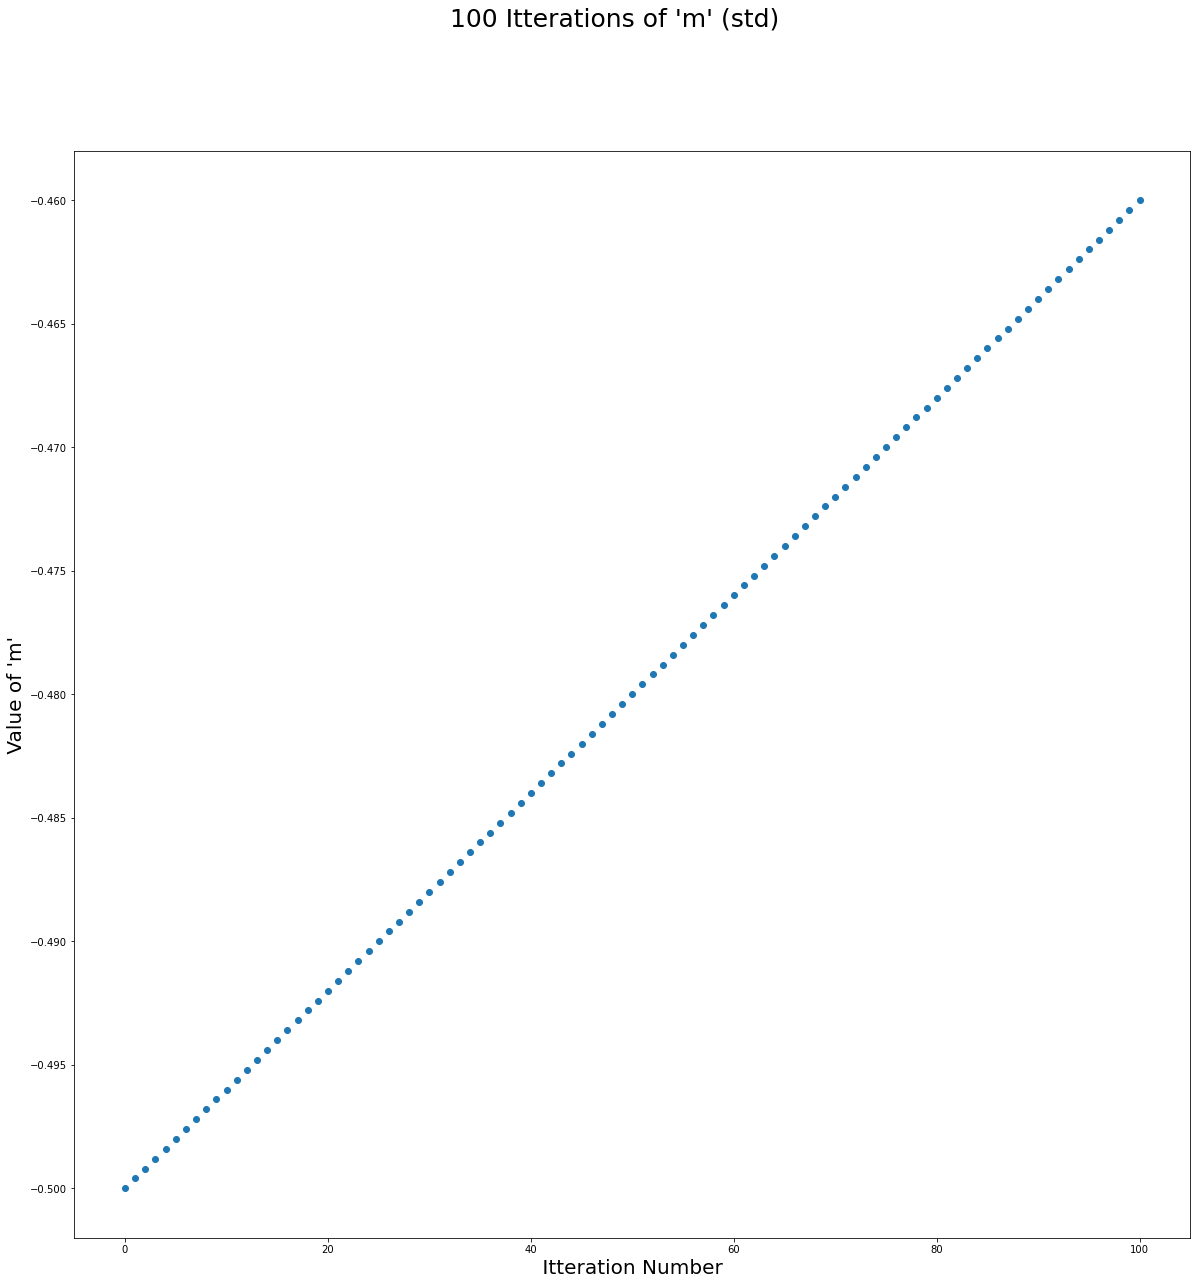

In [280]:
x_axis = [x for x in range(0,101)]
fig1 = plt.figure(1, figsize=(20,20))
fig1.suptitle(" 100 Itterations of 'm' (std) ", fontsize=25)
chart1 = fig1.add_subplot()
chart1.scatter(x_axis,res_m)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'm' ", fontsize=20)
plt.show()

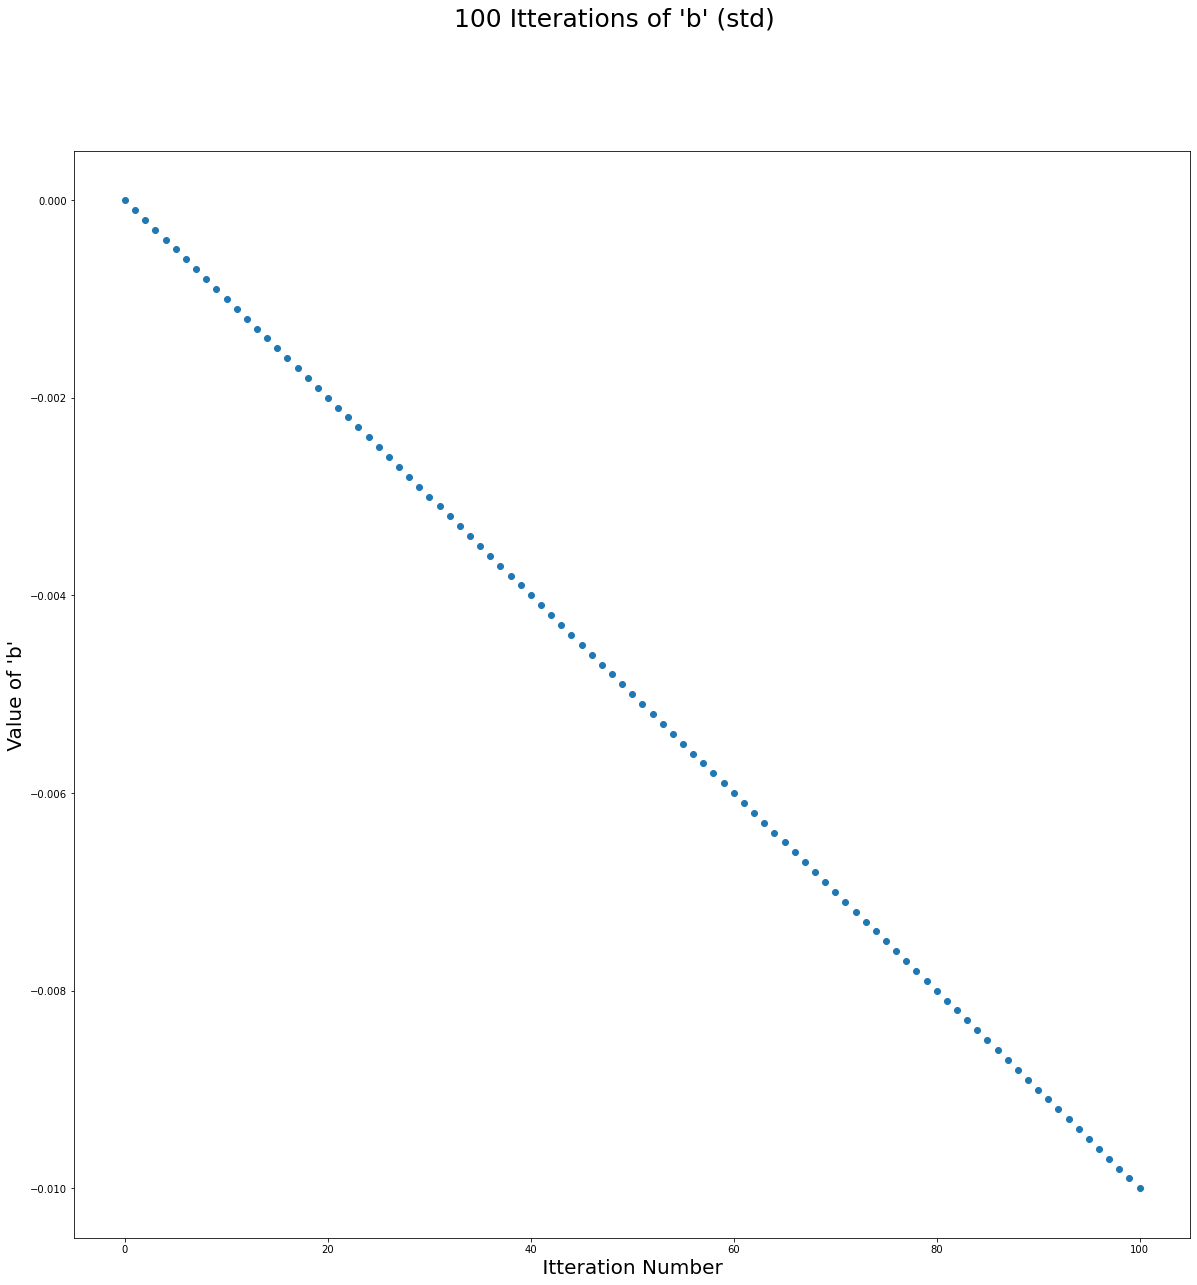

In [281]:
fig2 = plt.figure(1, figsize=(20,20))
fig2.suptitle(" 100 Itterations of 'b' (std) ", fontsize=25)
chart2 = fig2.add_subplot()
chart2.scatter(x_axis,res_b)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'b' ", fontsize=20)
plt.show()

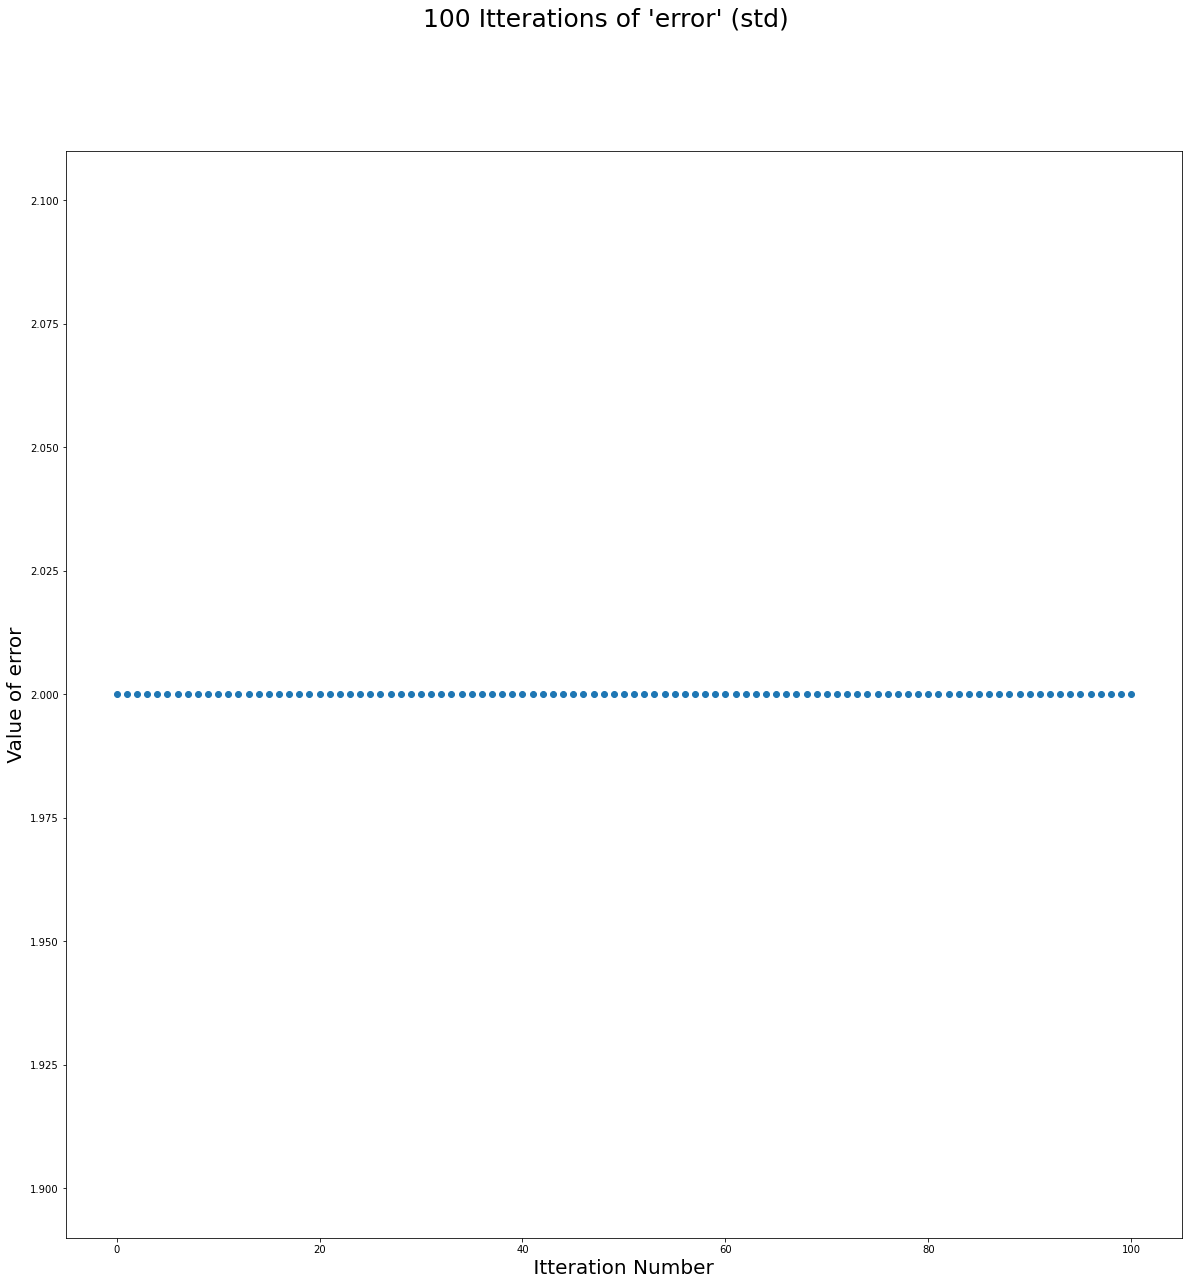

In [282]:
fig3 = plt.figure(1, figsize=(20,20))
fig3.suptitle(" 100 Itterations of 'error' (std) ", fontsize=25)
chart3 = fig3.add_subplot()
chart3.scatter(x_axis,res_e)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [283]:
res_m = []
res_b = []
res_e = []


mval = -0.5
bval = 0
alp = 0.0001

res_m.append(mval)
res_b.append(bval)
res_e.append(error(midterms,finals,mval,bval))

# without standardization
for i in range(100):
    m_new = new_m(midterms,finals,mval,bval,alp)
    b_new = new_b(midterms,finals,mval,bval,alp)
    err_new = error(midterms,finals,m_new,b_new)

    res_m.append(m_new)
    res_b.append(b_new)
    res_e.append(err_new)

    mval = m_new
    bval = b_new

mVal = res_m[-1]
bVal = res_b[-1]

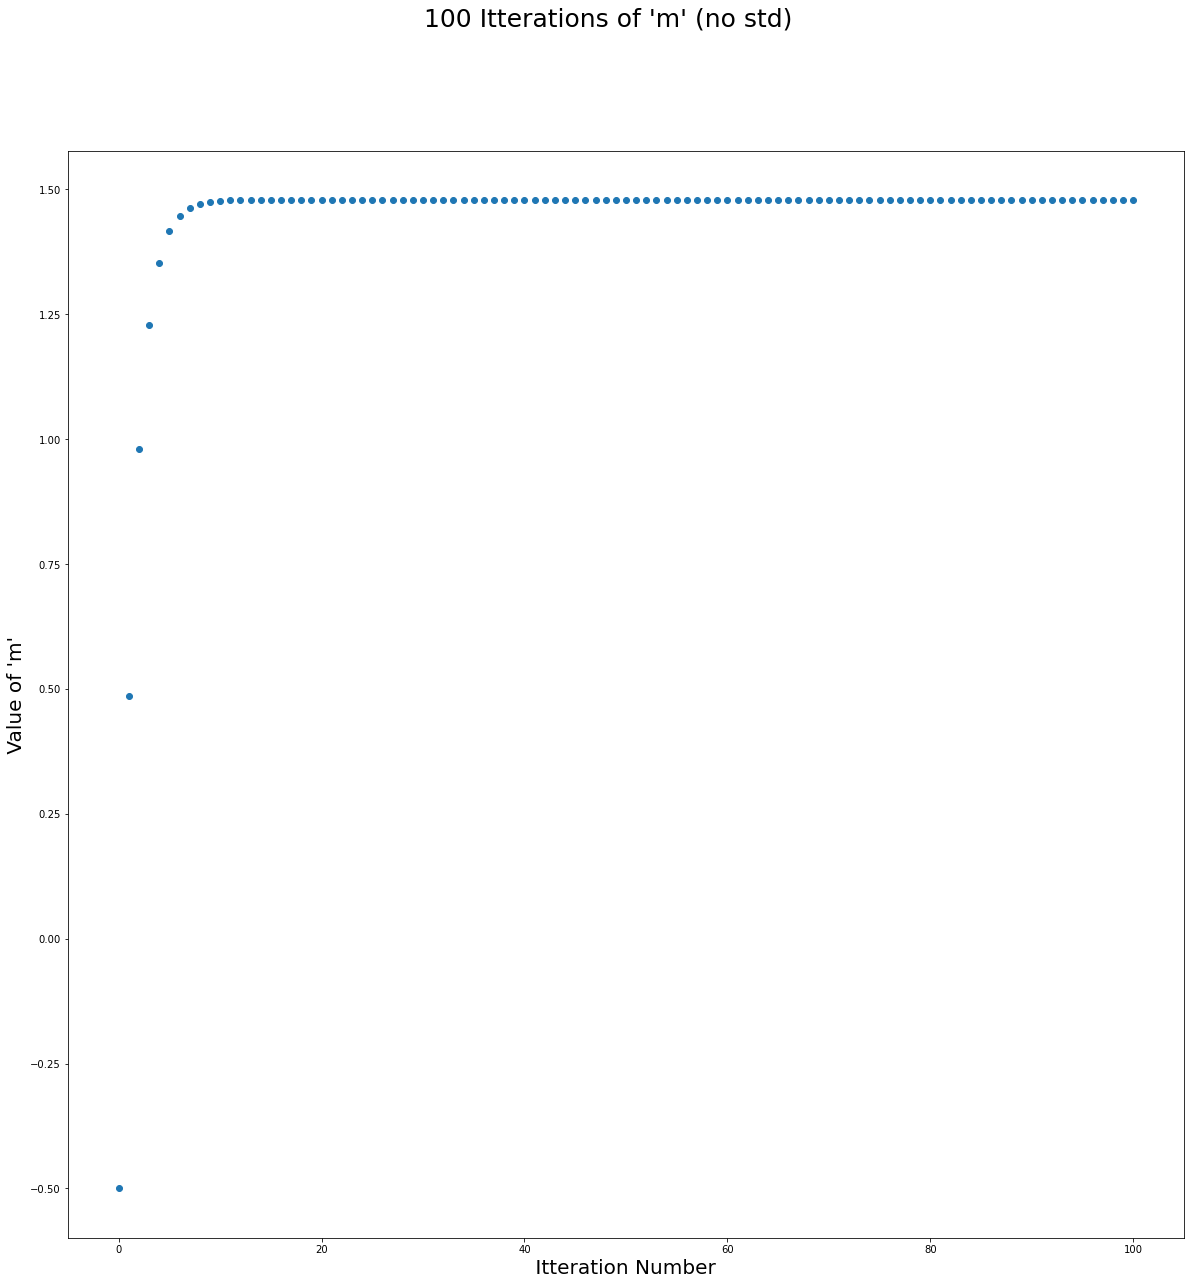

In [284]:
fig4 = plt.figure(1, figsize=(20,20))
fig4.suptitle(" 100 Itterations of 'm' (no std) ", fontsize=25)
chart4 = fig4.add_subplot()
chart4.scatter(x_axis,res_m)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'm' ", fontsize=20)
plt.show()

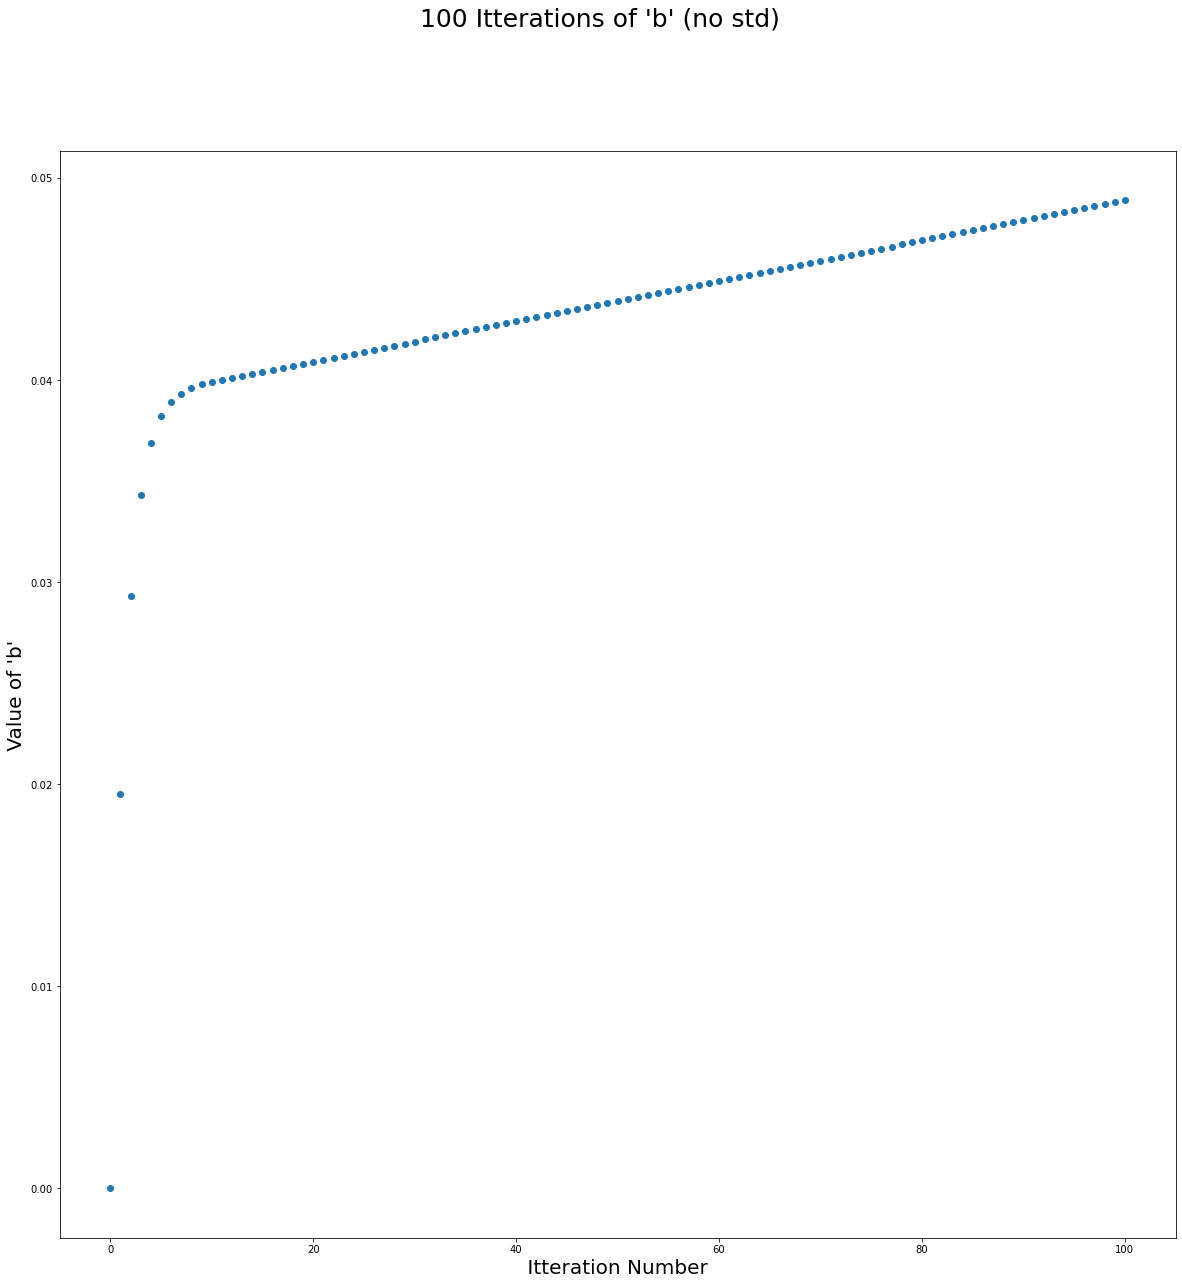

In [285]:
fig5 = plt.figure(1, figsize=(20,20))
fig5.suptitle(" 100 Itterations of 'b' (no std) ", fontsize=25)
chart5 = fig5.add_subplot()
chart5.scatter(x_axis,res_b)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'b' ", fontsize=20)
plt.show()

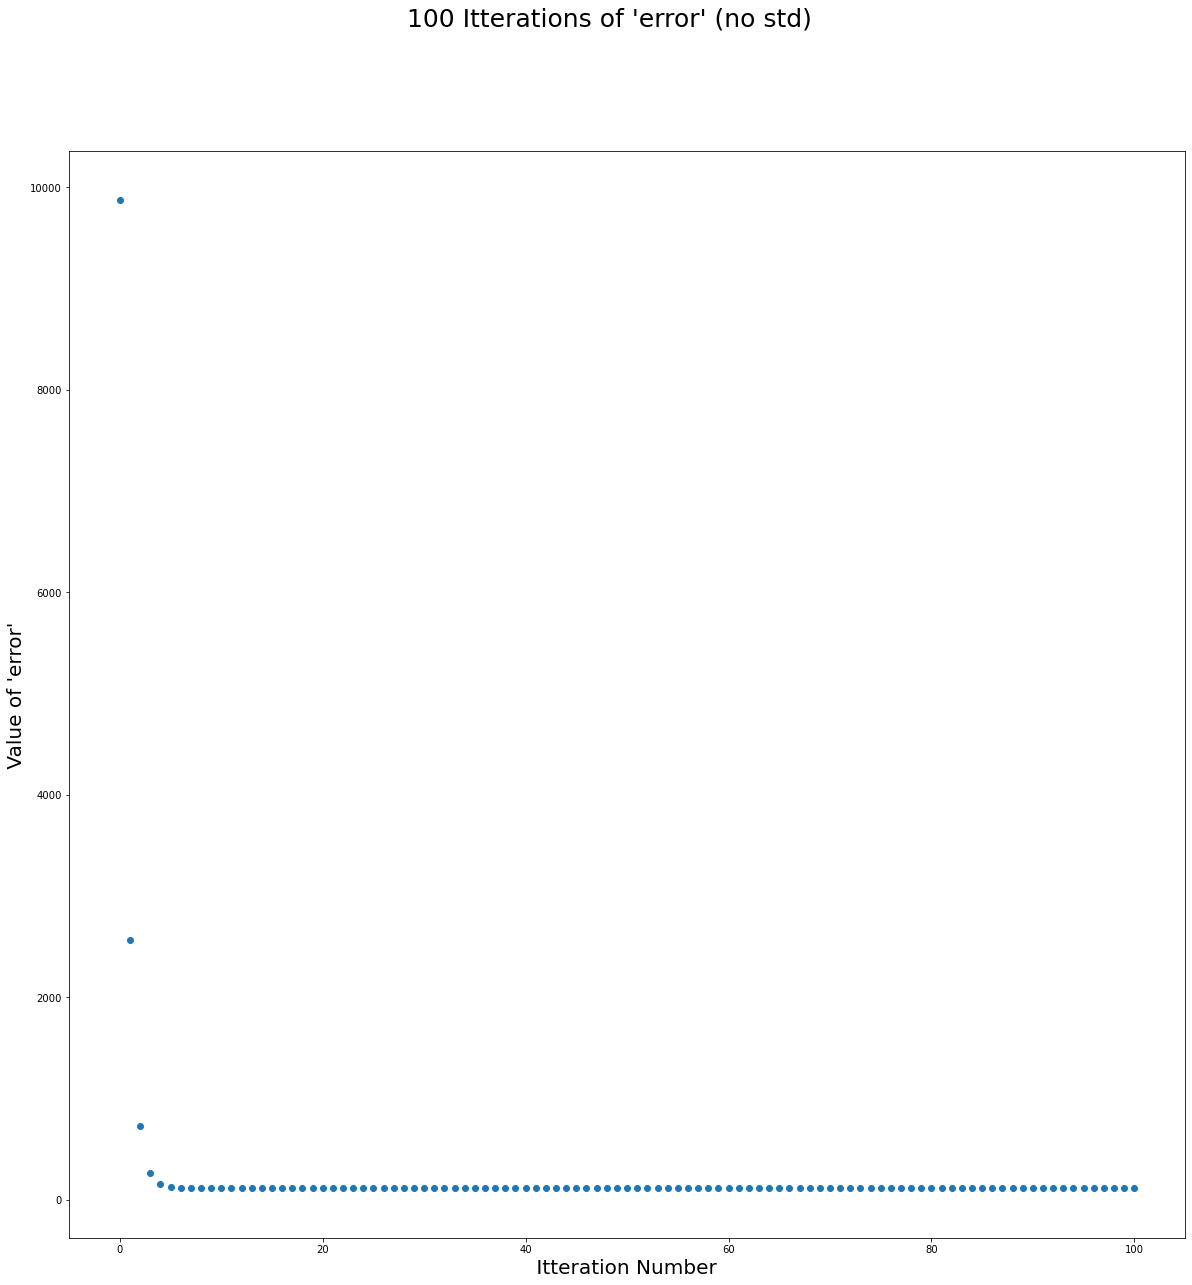

In [286]:
fig6 = plt.figure(1, figsize=(20,20))
fig6.suptitle(" 100 Itterations of 'error' (no std) ", fontsize=25)
chart6 = fig6.add_subplot()
chart6.scatter(x_axis,res_e)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'error' ", fontsize=20)
plt.show()

In [287]:
res_m = []
res_b = []
res_e = []


mval = -0.5
bval = 0
alp = 0.0001

res_m.append(mval)
res_b.append(bval)

mid_std = standardization(midterms)
fin_std = standardization(finals)

res_e.append(error(mid_std,fin_std,mval,bval))

# with standardization
for i in range(2000):
    m_new = new_m(mid_std,fin_std,mval,bval,alp)
    b_new = new_b(mid_std,fin_std,mval,bval,alp)
    err_new = error(mid_std,fin_std,m_new,b_new)

    res_m.append(m_new)
    res_b.append(b_new)
    res_e.append(err_new)

    mval = m_new
    bval = b_new

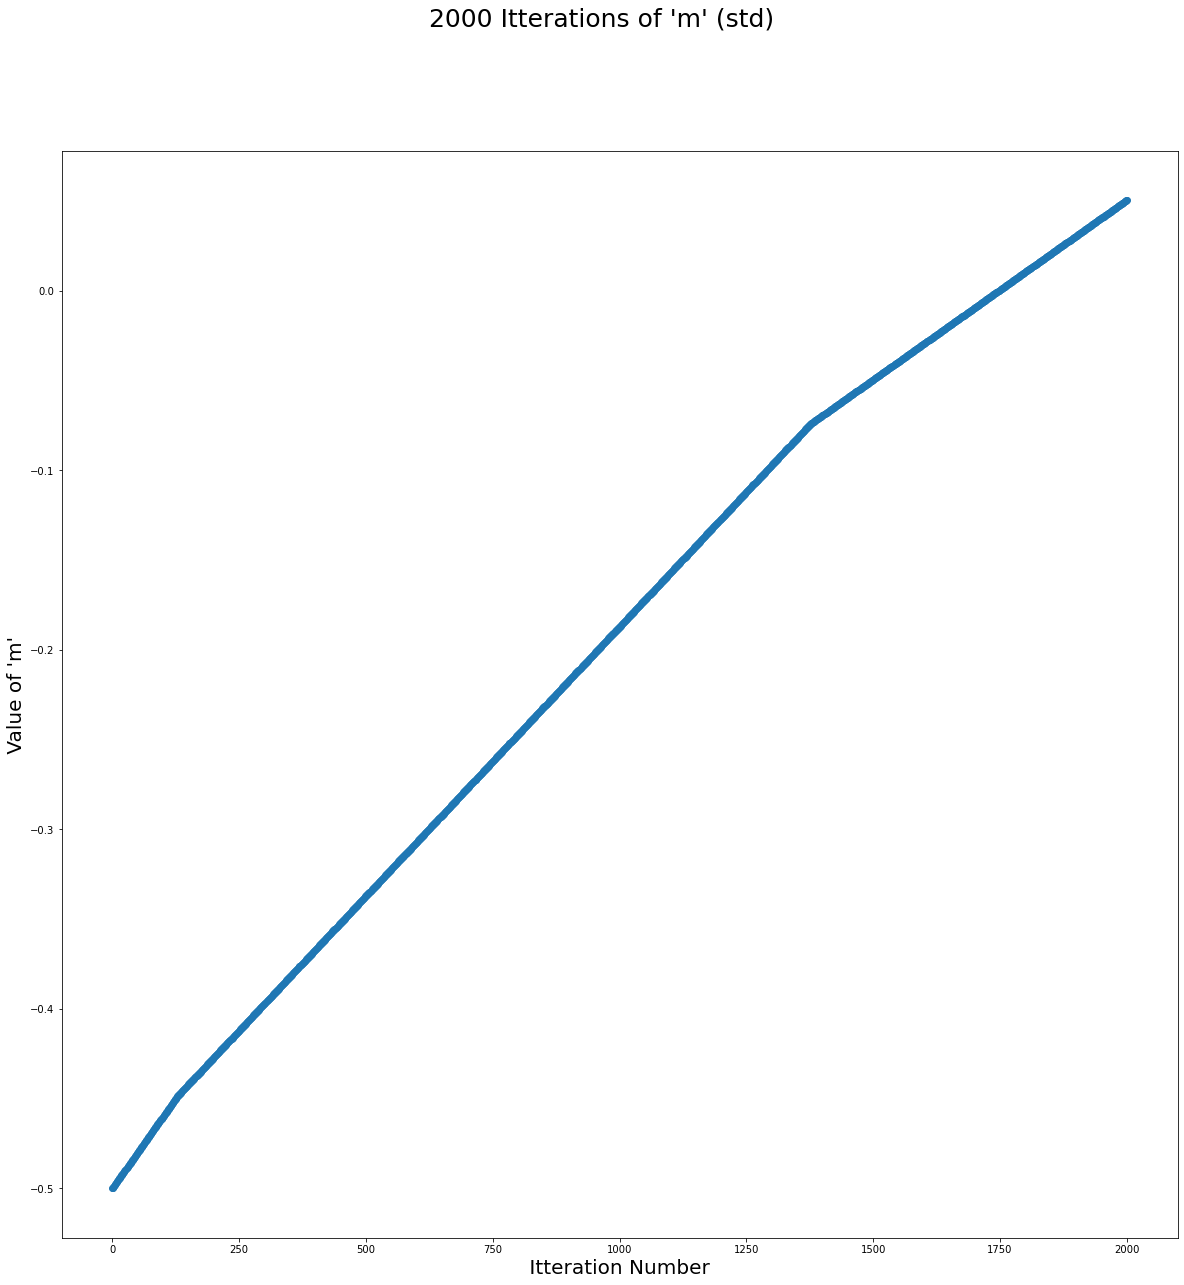

In [288]:
x_axis = [x for x in range(0,2001)]
fig7 = plt.figure(1, figsize=(20,20))
fig7.suptitle(" 2000 Itterations of 'm' (std) ", fontsize=25)
chart7 = fig7.add_subplot()
chart7.scatter(x_axis,res_m)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'm' ", fontsize=20)
plt.show()

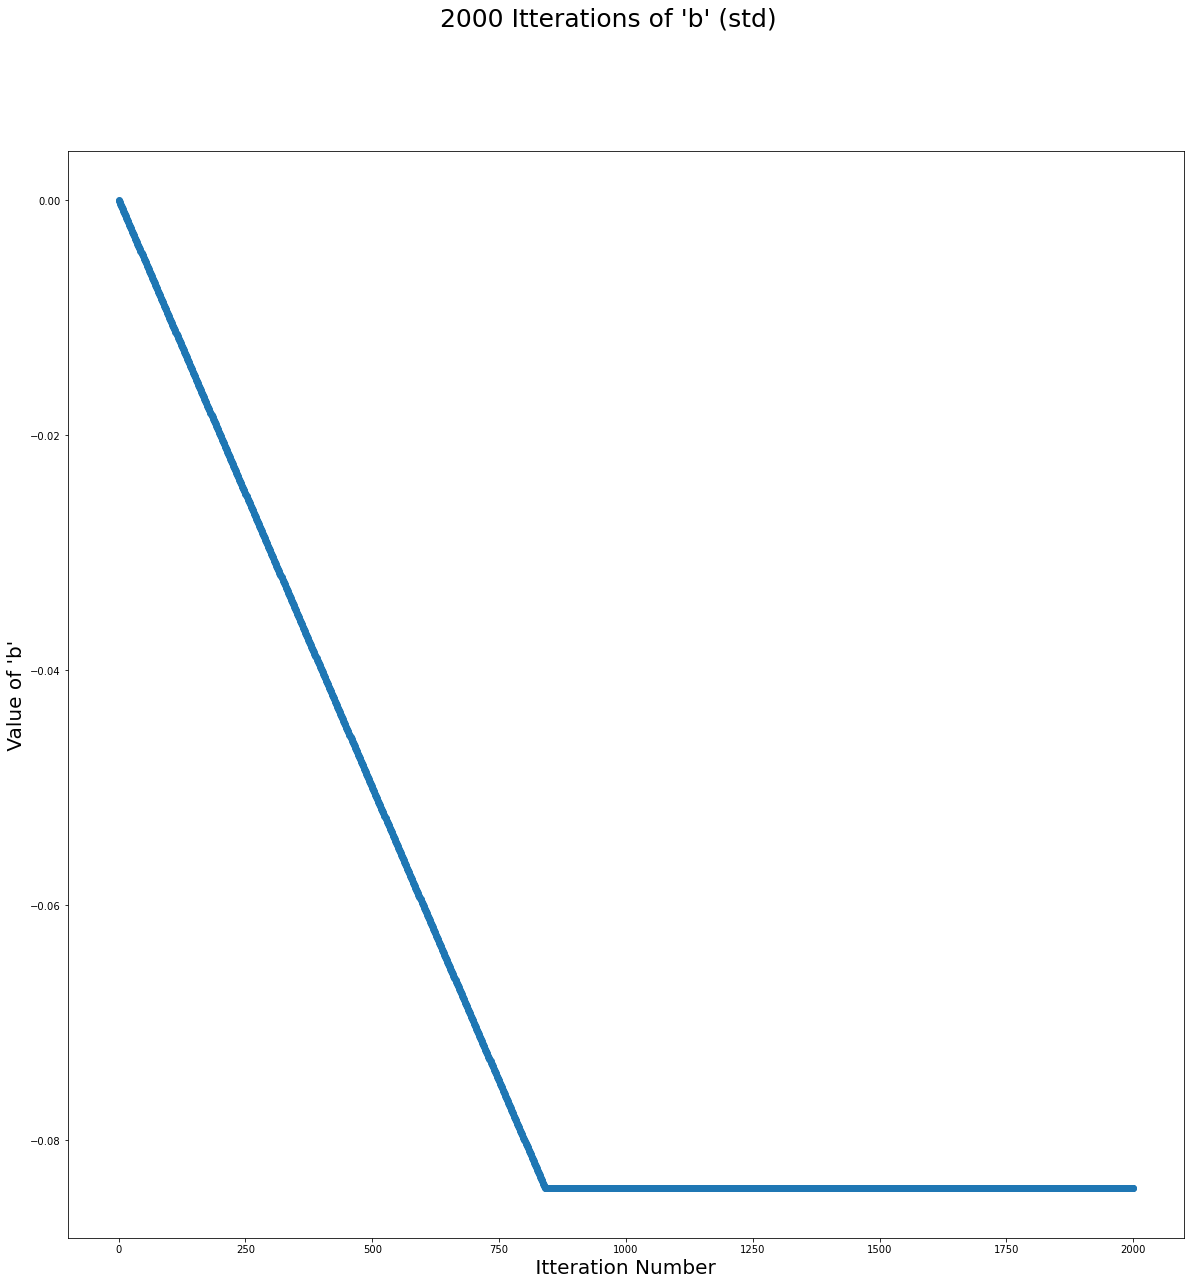

In [289]:
fig7 = plt.figure(1, figsize=(20,20))
fig7.suptitle(" 2000 Itterations of 'b' (std) ", fontsize=25)
chart7 = fig7.add_subplot()
chart7.scatter(x_axis,res_b)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'b' ", fontsize=20)
plt.show()

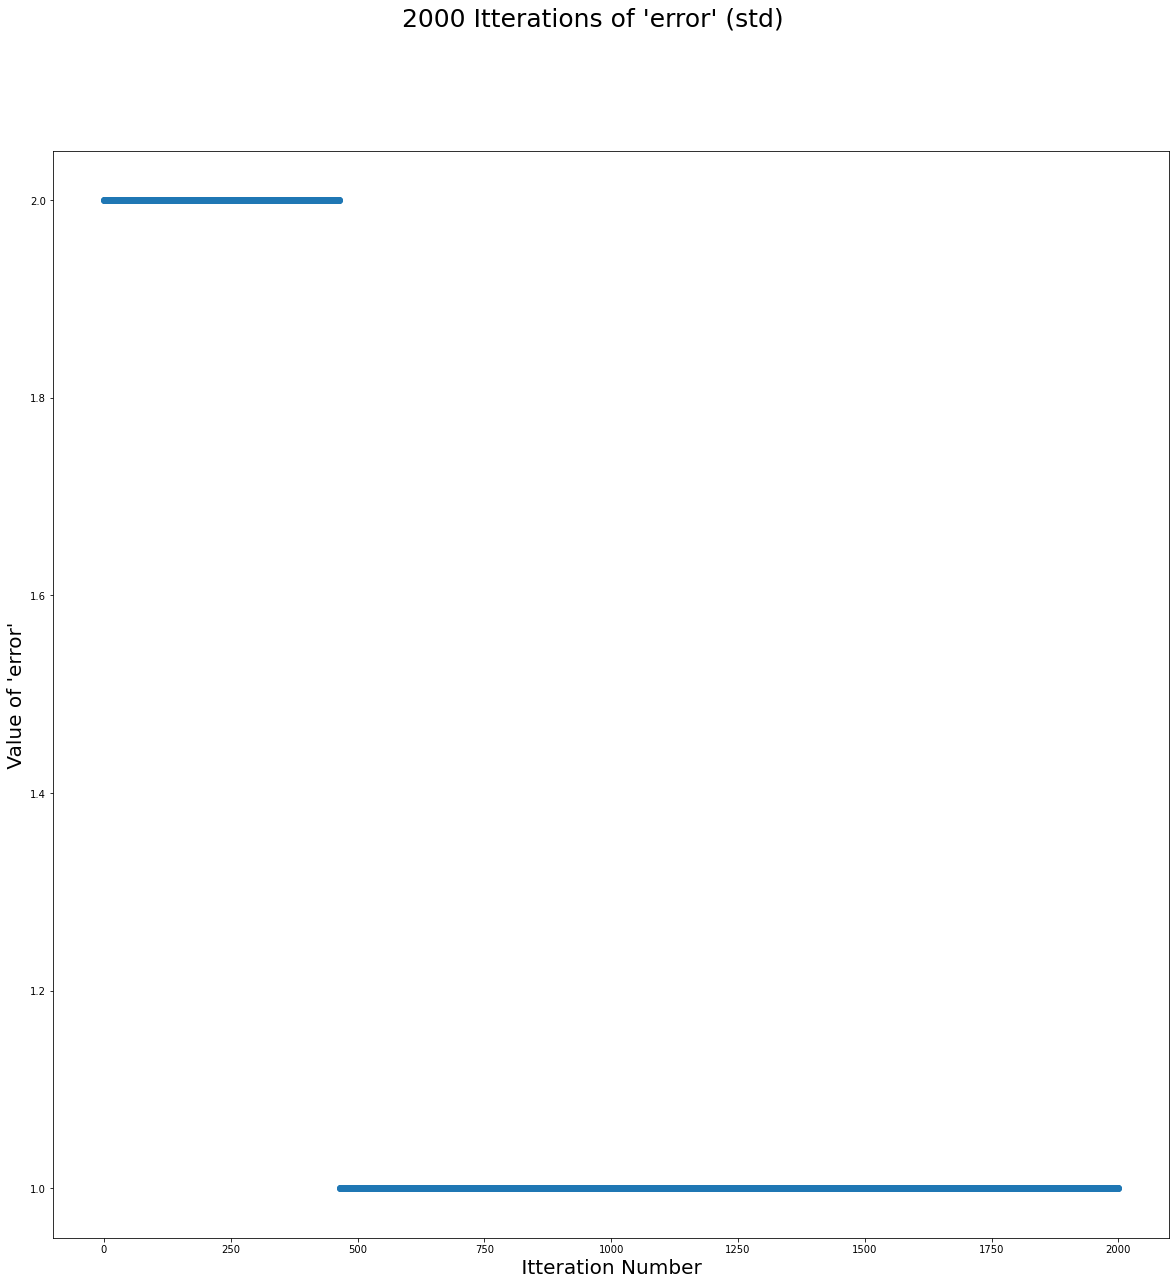

In [290]:
fig8 = plt.figure(1, figsize=(20,20))
fig8.suptitle(" 2000 Itterations of 'error' (std) ", fontsize=25)
chart8 = fig8.add_subplot()
chart8.scatter(x_axis,res_e)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'error' ", fontsize=20)
plt.show()

In [291]:
res_m = []
res_b = []
res_e = []


mval = -0.5
bval = 0
alp = 0.0001

res_m.append(mval)
res_b.append(bval)
res_e.append(error(midterms,finals,mval,bval))

# without standardization
for i in range(2000):
    m_new = new_m(midterms,finals,mval,bval,alp)
    b_new = new_b(midterms,finals,mval,bval,alp)
    err_new = error(midterms,finals,m_new,b_new)

    res_m.append(m_new)
    res_b.append(b_new)
    res_e.append(err_new)

    mval = m_new
    bval = b_new

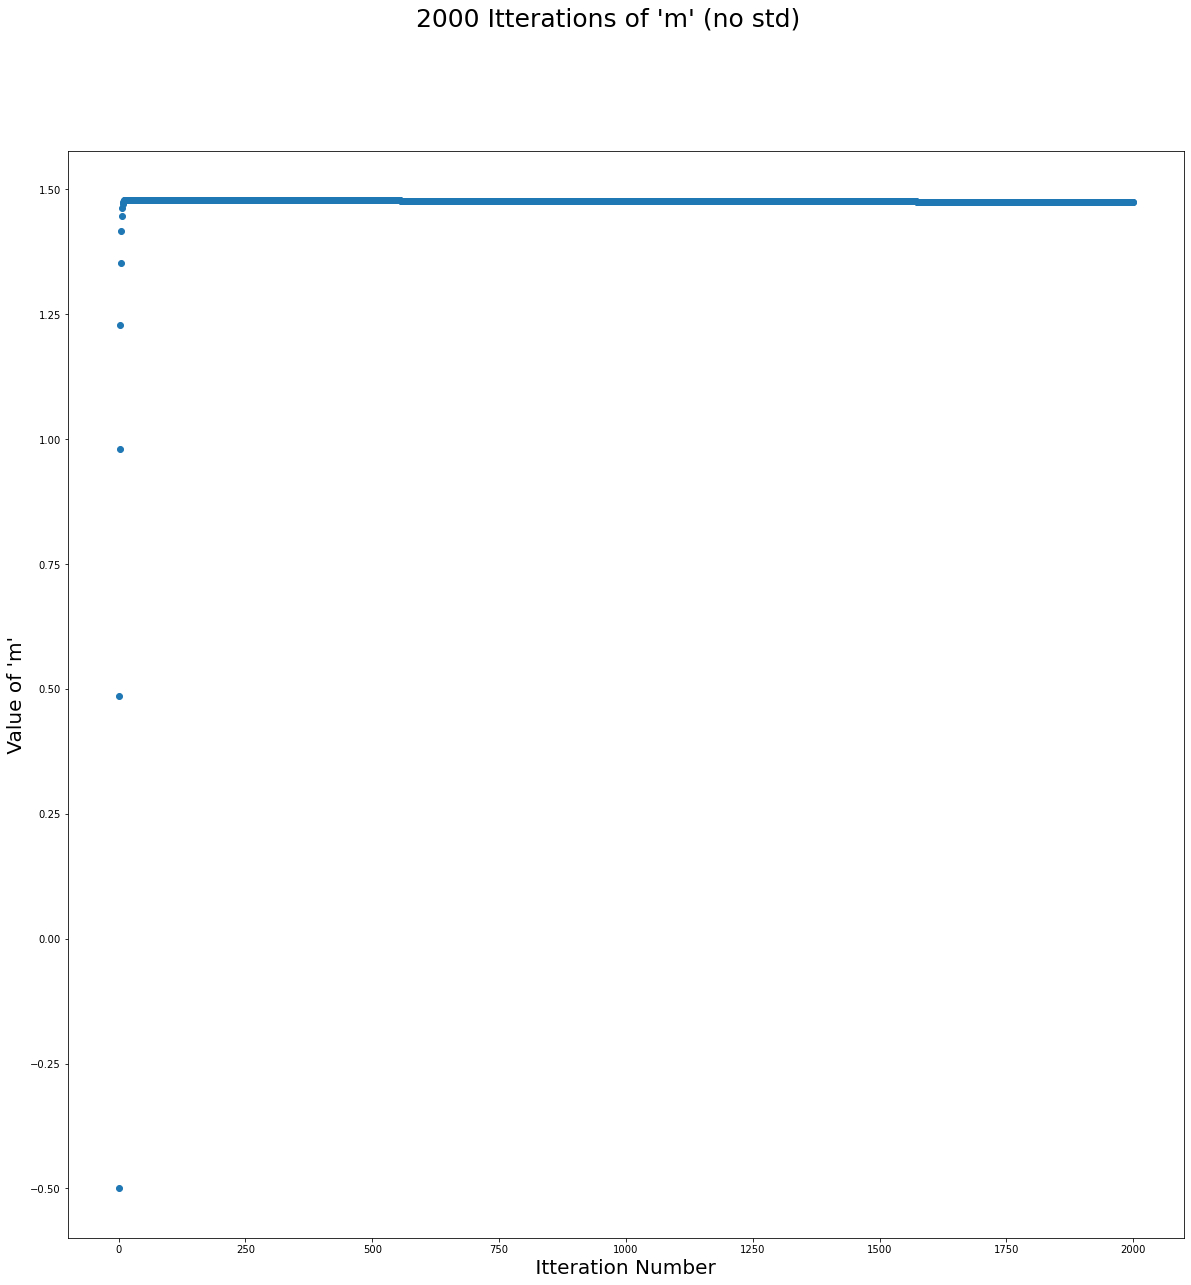

In [292]:
fig9 = plt.figure(1, figsize=(20,20))
fig9.suptitle(" 2000 Itterations of 'm' (no std) ", fontsize=25)
chart9 = fig9.add_subplot()
chart9.scatter(x_axis,res_m)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'm' ", fontsize=20)
plt.show()

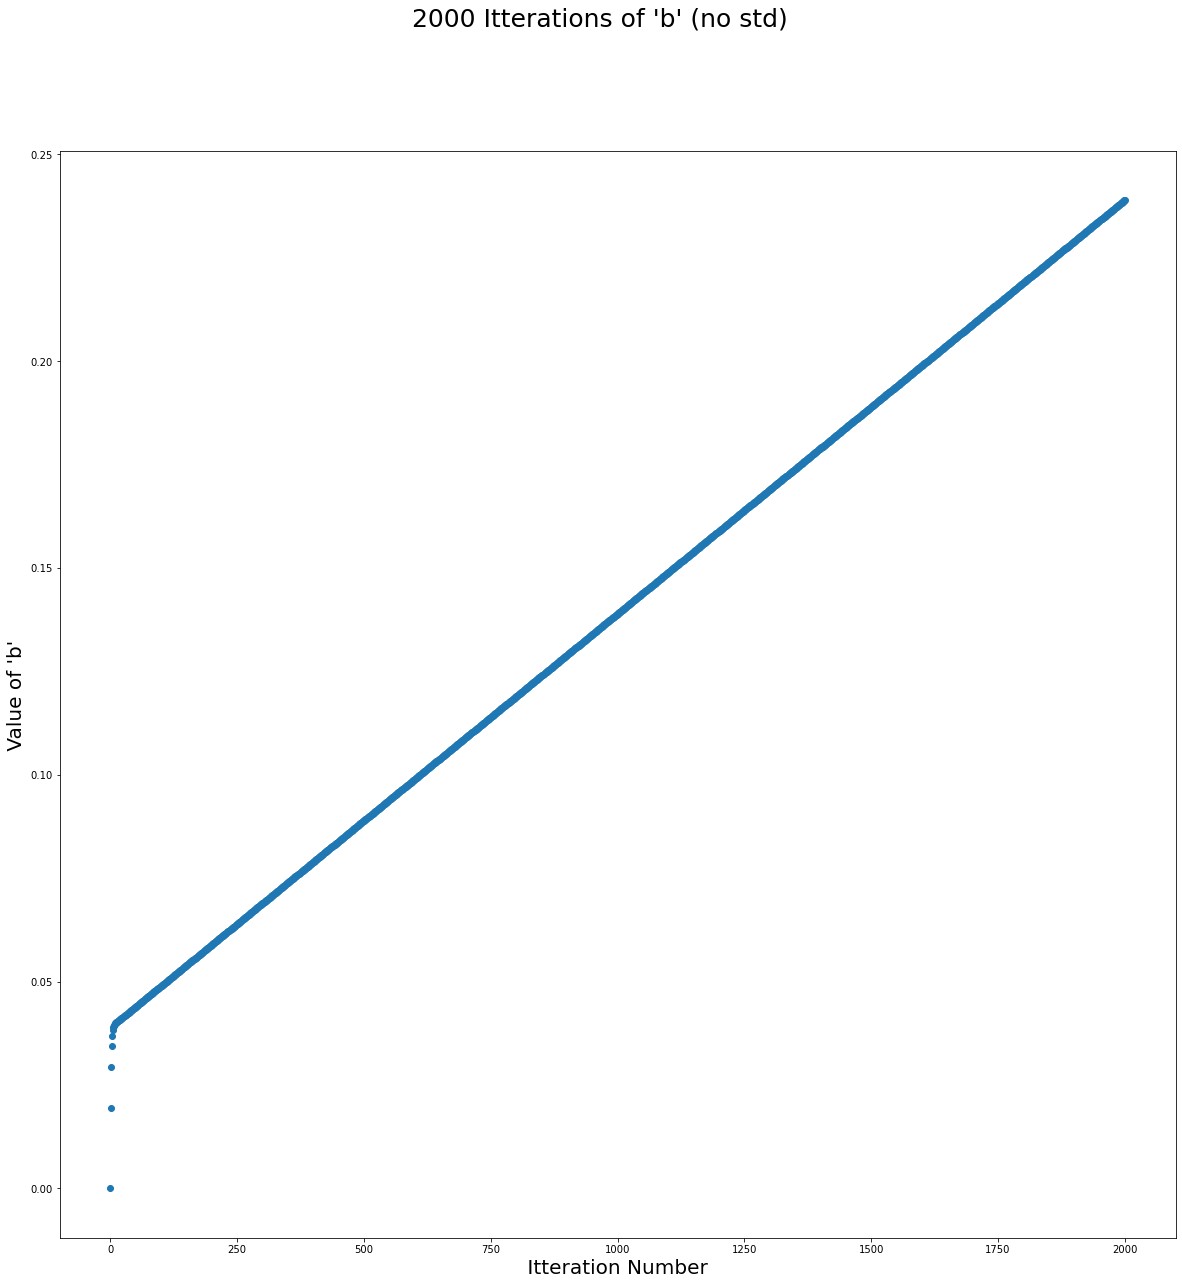

In [293]:
fig10 = plt.figure(1, figsize=(20,20))
fig10.suptitle(" 2000 Itterations of 'b' (no std) ", fontsize=25)
chart10 = fig10.add_subplot()
chart10.scatter(x_axis,res_b)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'b' ", fontsize=20)
plt.show()

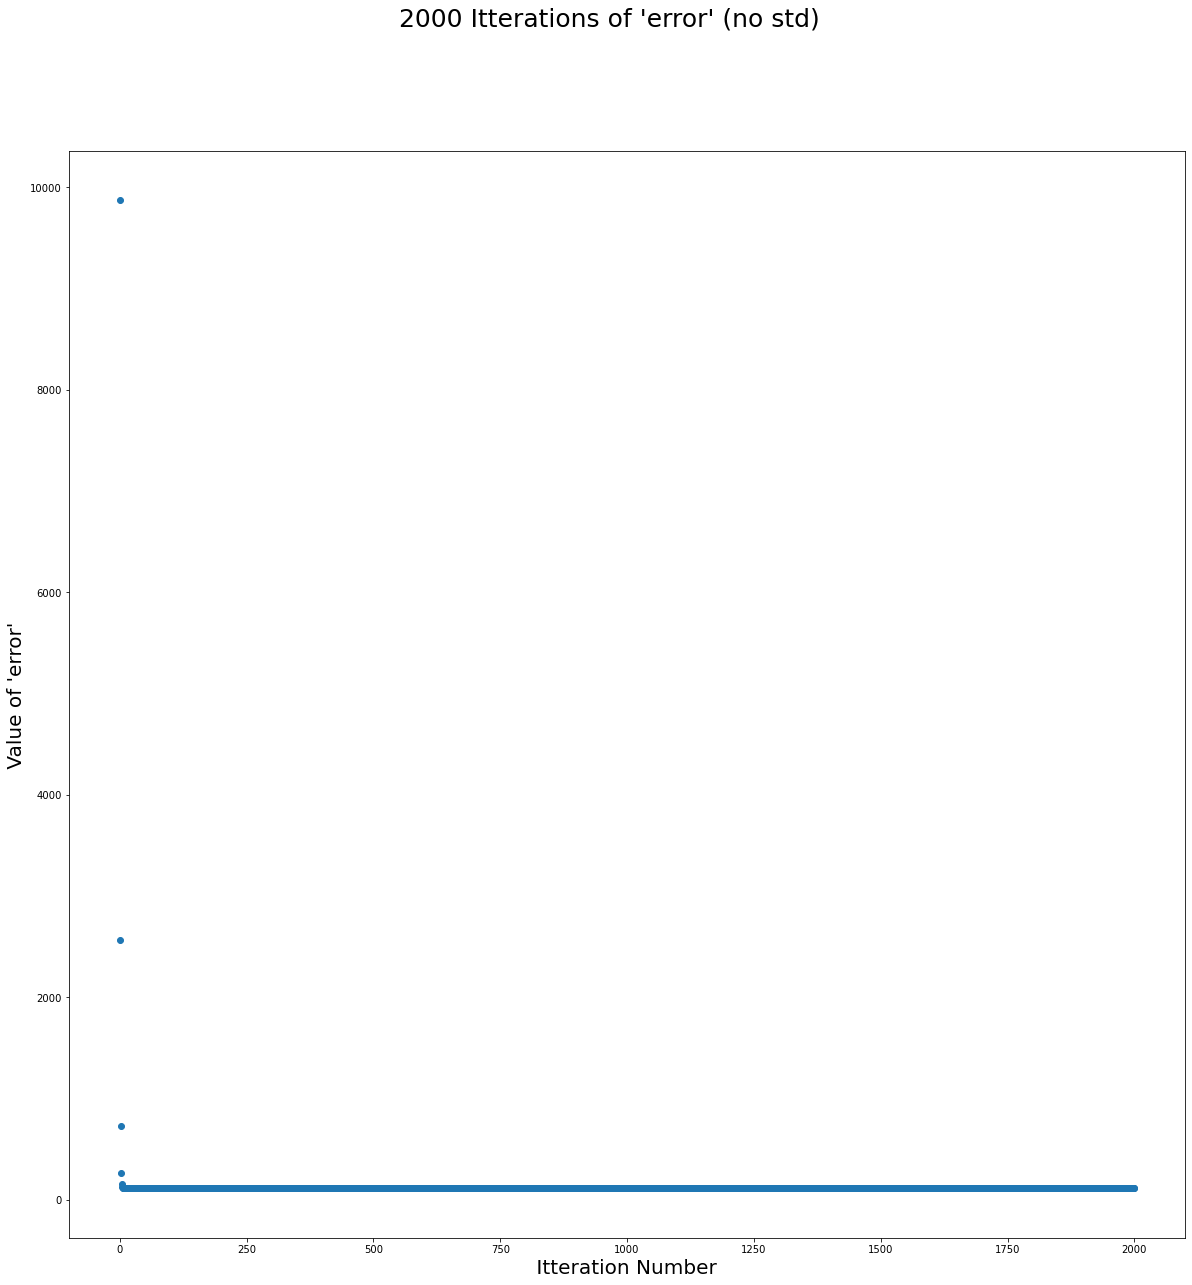

In [294]:
fig11 = plt.figure(1, figsize=(20,20))
fig11.suptitle(" 2000 Itterations of 'error' (no std) ", fontsize=25)
chart11 = fig11.add_subplot()
chart11.scatter(x_axis,res_e)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'error' ", fontsize=20)
plt.show()

In [295]:
lin_reg = LinearRegression()

X = np.array(midterms)
Y = np.array(finals)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)


lin_reg_model = lin_reg.fit(X,Y)
model_score = lin_reg_model.score(X, Y)

log_message = f'The score of the model is: {model_score}.'
print(log_message)

log_message = f'The coef of the model is: {lin_reg_model.coef_}.'
print(log_message)

log_message = f'The intercept of the model is: {lin_reg_model.intercept_}.'
print(log_message) 

model_predict = lin_reg_model.predict(X)
log_message = f'The model predictions for the samne values are:\n X =\n {X}\n predictions = \n ${model_predict}.'
print(log_message)



The score of the model is: 0.5982684385776686.
The coef of the model is: [[1.32199232]].
The intercept of the model is: [8.01157814].
The model predictions for the samne values are:
 X =
 [['32.5']
 ['53.4']
 ['61.5']
 ['47.5']
 ['59.8']
 ['55.1']
 ['52.2']
 ['39.3']
 ['48.1']
 ['52.6']
 ['45.4']
 ['54.4']
 ['44.2']
 ['58.2']
 ['56.7']
 ['49']
 ['44.7']
 ['60.3']
 ['45.6']
 ['38.8']
 ['66.2']
 ['65.4']
 ['47.5']
 ['41.6']
 ['51.8']
 ['59.4']
 ['57.3']
 ['63.6']
 ['46.7']
 ['50.6']
 ['52.2']
 ['35.6']
 ['42.4']
 ['58.2']
 ['57.5']
 ['45.4']
 ['61.9']
 ['33.1']
 ['36.4']
 ['37.7']
 ['44.6']
 ['43.3']
 ['50.1']
 ['43.9']
 ['63']
 ['32.7']
 ['40.2']
 ['53.6']
 ['33.9']
 ['64.7']
 ['38.1']
 ['44.5']
 ['40.6']
 ['41.7']
 ['51.1']
 ['55.1']
 ['41.4']
 ['62.5']
 ['49.2']
 ['41.1']
 ['41.2']
 ['50.2']
 ['52.4']
 ['50.1']
 ['33.6']
 ['39.6']
 ['56.1']
 ['57.4']
 ['60.3']
 ['35.7']
 ['31.6']
 ['53.7']
 ['46.7']
 ['43.1']
 ['70.3']
 ['44.5']
 ['57.5']
 ['36.9']
 ['55.8']
 ['39']
 ['56.9']
 ['56.9'

In [296]:
results = []
for x in midterms:
    results.append(mVal*float(x)+bVal)
print(results)

[48.10340000000001, 79.00614, 90.98280000000001, 70.28240000000001, 88.46918000000001, 81.51976000000002, 77.23182000000001, 58.157880000000006, 71.16956000000002, 77.82326000000002, 67.17734, 80.48474, 65.40302000000001, 86.10342000000001, 83.88552000000001, 72.50030000000001, 66.14232000000001, 89.20848000000001, 67.47306000000002, 57.418580000000006, 97.93222000000002, 96.74934000000002, 70.28240000000001, 61.55866000000001, 76.64038000000001, 87.87774, 84.77268000000001, 94.08786000000002, 69.09952000000001, 74.86606000000002, 77.23182000000001, 52.68706000000001, 62.74154000000001, 86.10342000000001, 85.06840000000001, 67.17734, 91.57424, 48.99056000000001, 53.86994000000001, 55.79212000000001, 65.99446000000002, 64.07228, 74.12676000000002, 64.95944, 93.20070000000001, 48.39912000000001, 59.48862000000001, 79.30186000000002, 50.17344000000001, 95.71432000000001, 56.38356000000001, 65.84660000000001, 60.08006000000001, 61.70652000000001, 75.60536000000002, 81.51976000000002, 61.26

In [297]:
print(finals)

['31.7', '68.8', '62.6', '71.5', '87.2', '78.2', '79.6', '59.2', '75.3', '71.3', '55.2', '82.5', '62', '75.4', '81.4', '60.7', '82.9', '97.4', '48.8', '56.9', '83.9', '118.6', '57.3', '51.4', '75.4', '74.8', '95.5', '95.2', '79.1', '83.4', '63.4', '41.4', '76.6', '96.8', '74.1', '66.6', '77.8', '50.7', '62.1', '60.8', '52.7', '58.6', '82.9', '61.4', '115.2', '45.6', '54.1', '88', '52.7', '93.6', '80.2', '65.1', '65.6', '65.3', '73.4', '71.1', '79.1', '86.5', '84.7', '59.4', '61.7', '69.8', '86.1', '59.1', '69.9', '44.9', '85.5', '95.5', '70.3', '52.7', '50.4', '63.6', '72.2', '57.8', '104.3', '86.6', '91.5', '55.2', '79.6', '44.8', '80.2', '83.1', '55.7', '77.6', '99.1', '79.1', '69.6', '69.5', '73.7', '61.4', '67.2', '85.7', '114.9', '90.1', '97.9', '81.5', '72.1', '85.2', '66.2', '53.5']


In [165]:
res_m = []
res_b = []
res_e = []


mval = -0.5
bval = 0
alp = 0.1

res_m.append(mval)
res_b.append(bval)

mid_std = standardization(midterms)
fin_std = standardization(finals)

res_e.append(error(mid_std,fin_std,mval,bval))

# with standardization
for i in range(100):
    m_new = new_m(mid_std,fin_std,mval,bval,alp)
    b_new = new_b(mid_std,fin_std,mval,bval,alp)
    err_new = error(mid_std,fin_std,m_new,b_new)

    res_m.append(m_new)
    res_b.append(b_new)
    res_e.append(err_new)

    mval = m_new
    bval = b_new

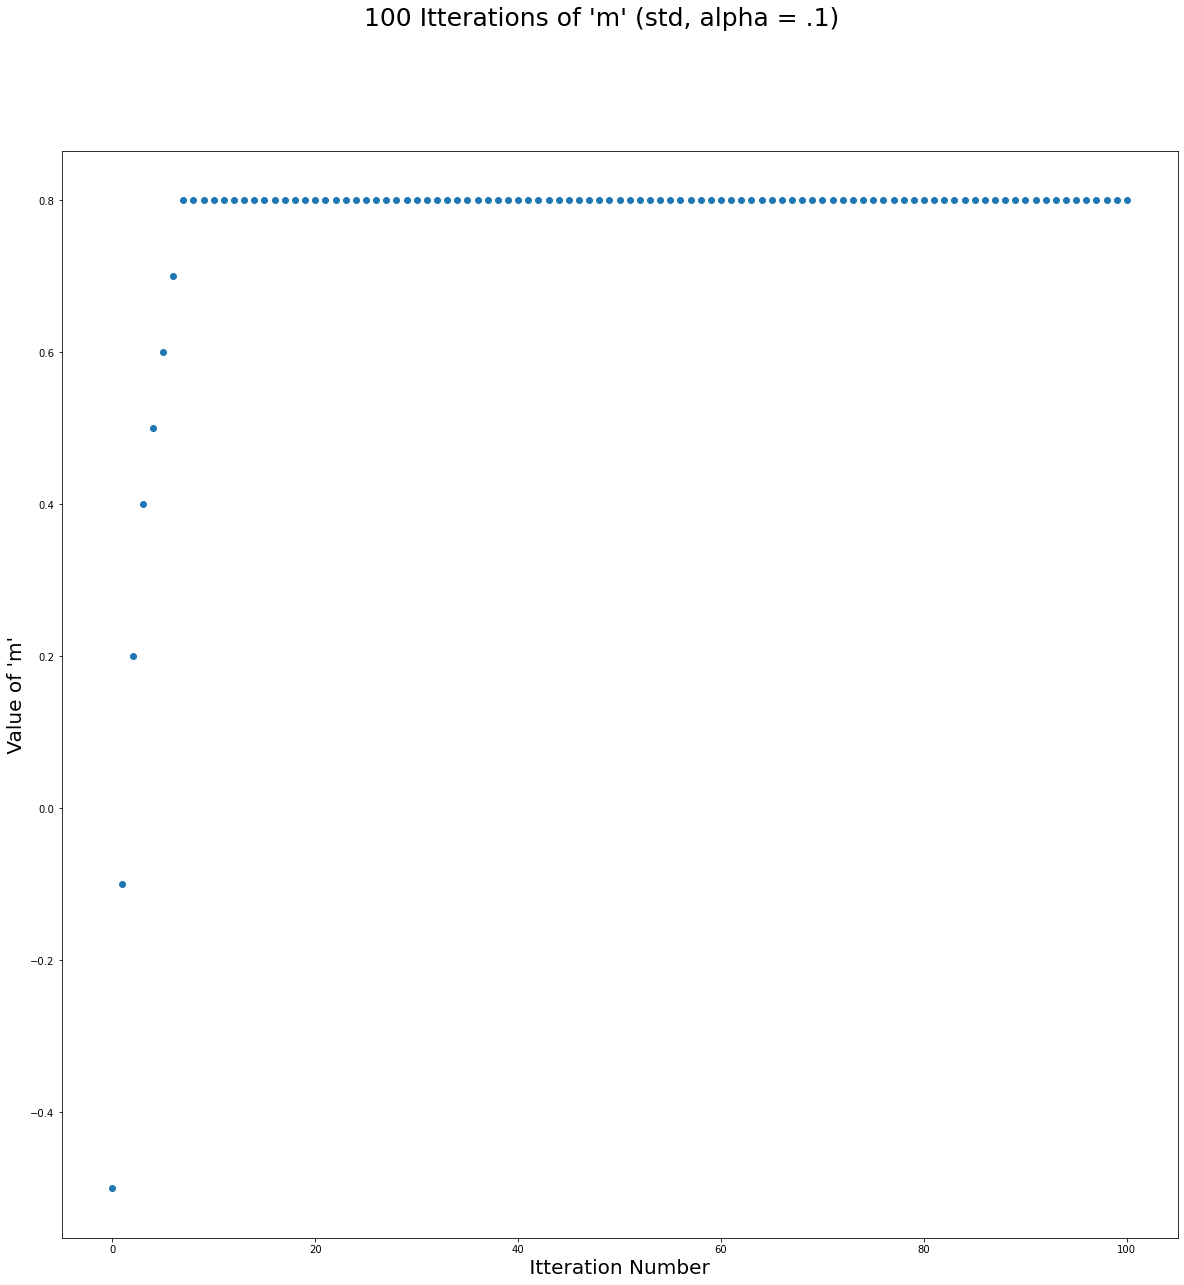

In [166]:
x_axis = [x for x in range(0,101)]
fig12 = plt.figure(1, figsize=(20,20))
fig12.suptitle(" 100 Itterations of 'm' (std, alpha = .1) ", fontsize=25)
chart12 = fig12.add_subplot()
chart12.scatter(x_axis,res_m)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'm' ", fontsize=20)
plt.show()

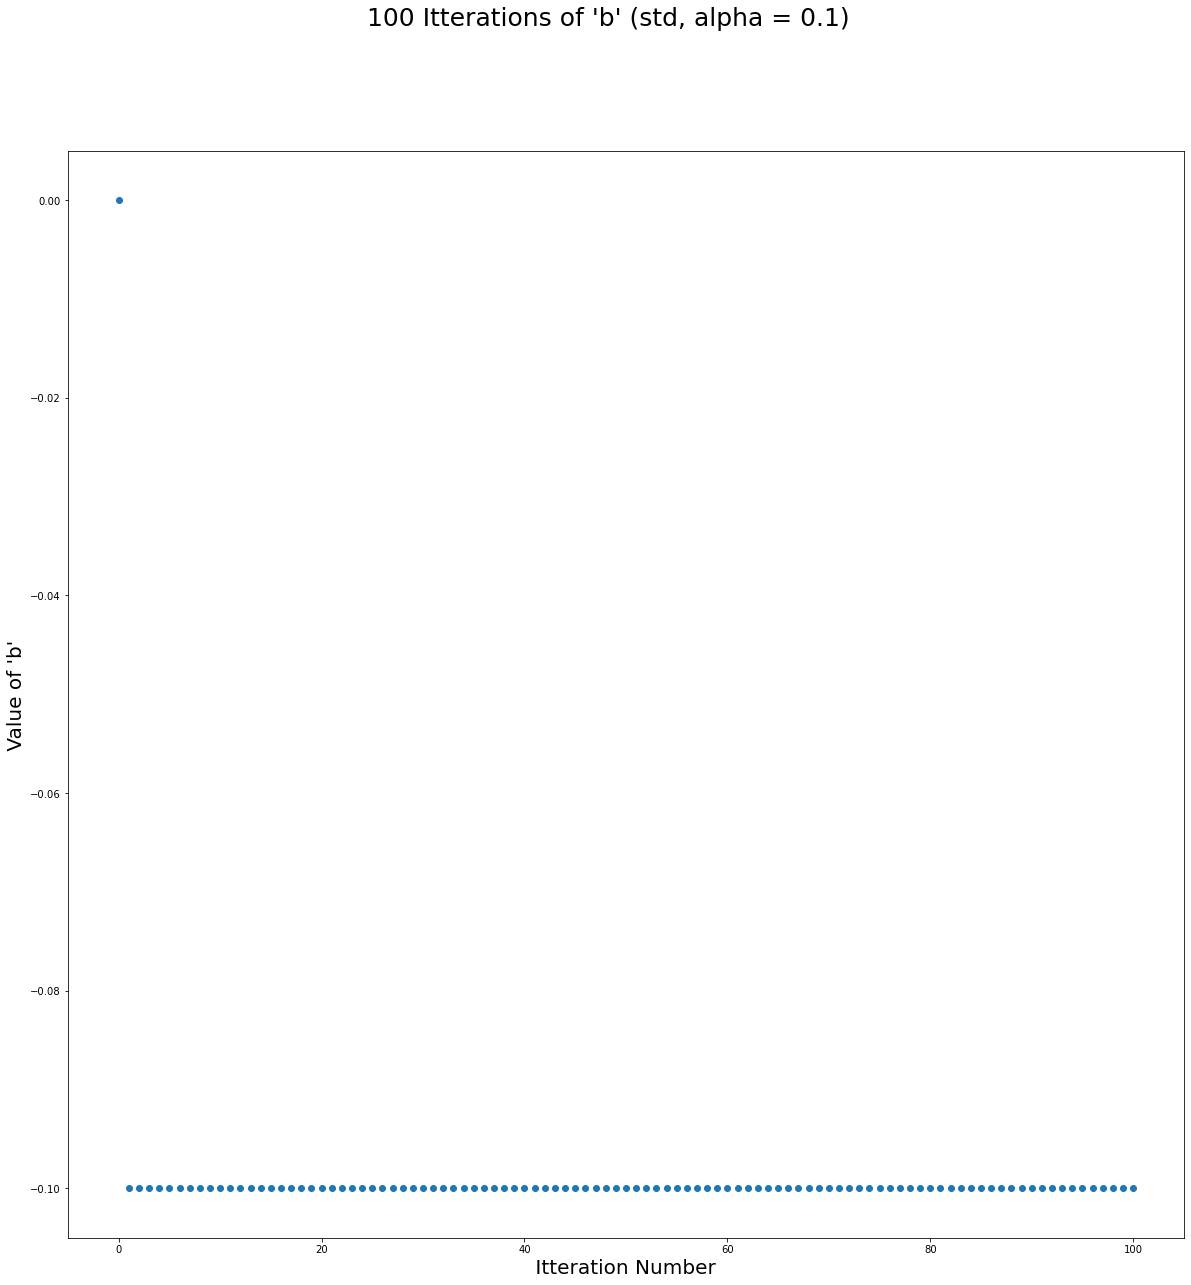

In [167]:
fig12 = plt.figure(1, figsize=(20,20))
fig12.suptitle(" 100 Itterations of 'b' (std, alpha = 0.1) ", fontsize=25)
chart12 = fig12.add_subplot()
chart12.scatter(x_axis,res_b)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'b' ", fontsize=20)
plt.show()

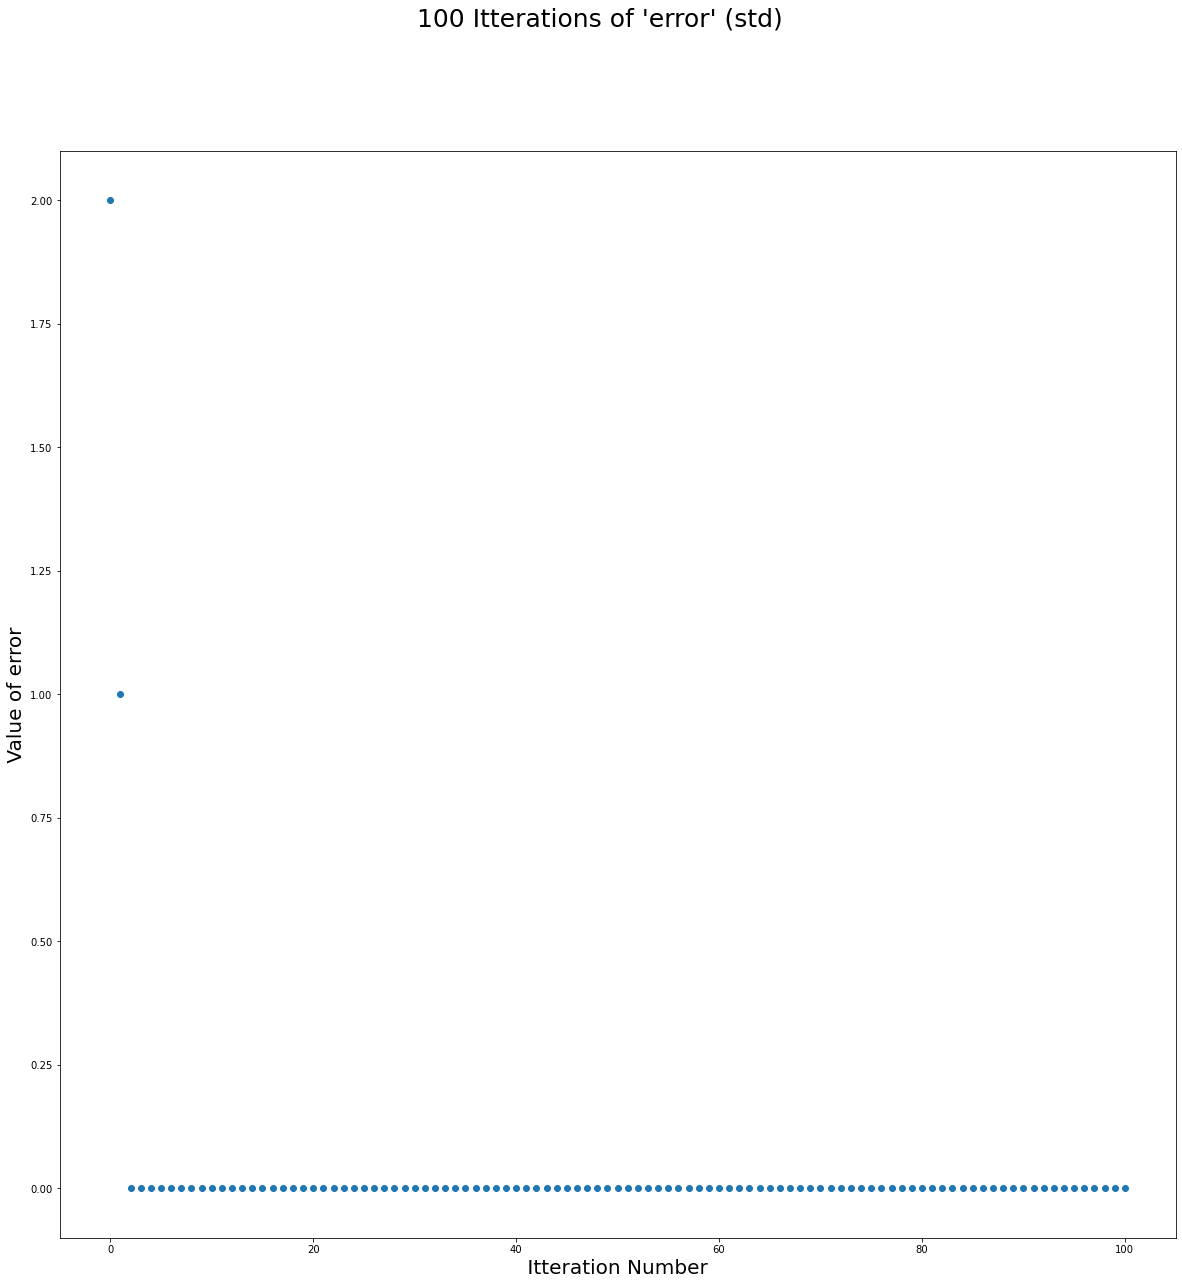

In [168]:
fig13 = plt.figure(1, figsize=(20,20))
fig13.suptitle(" 100 Itterations of 'error' (std) ", fontsize=25)
chart13 = fig13.add_subplot()
chart13.scatter(x_axis,res_e)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of error ", fontsize=20)
plt.show()

In [169]:
res_m = []
res_b = []
res_e = []


mval = -0.5
bval = 0
alp = 0.1

res_m.append(mval)
res_b.append(bval)
res_e.append(error(midterms,finals,mval,bval))

# without standardization
for i in range(100):
    m_new = new_m(midterms,finals,mval,bval,alp)
    b_new = new_b(midterms,finals,mval,bval,alp)
    # err_new = error(midterms,finals,m_new,b_new)

    res_m.append(m_new)
    res_b.append(b_new)
    # res_e.append(err_new)

    mval = m_new
    bval = b_new

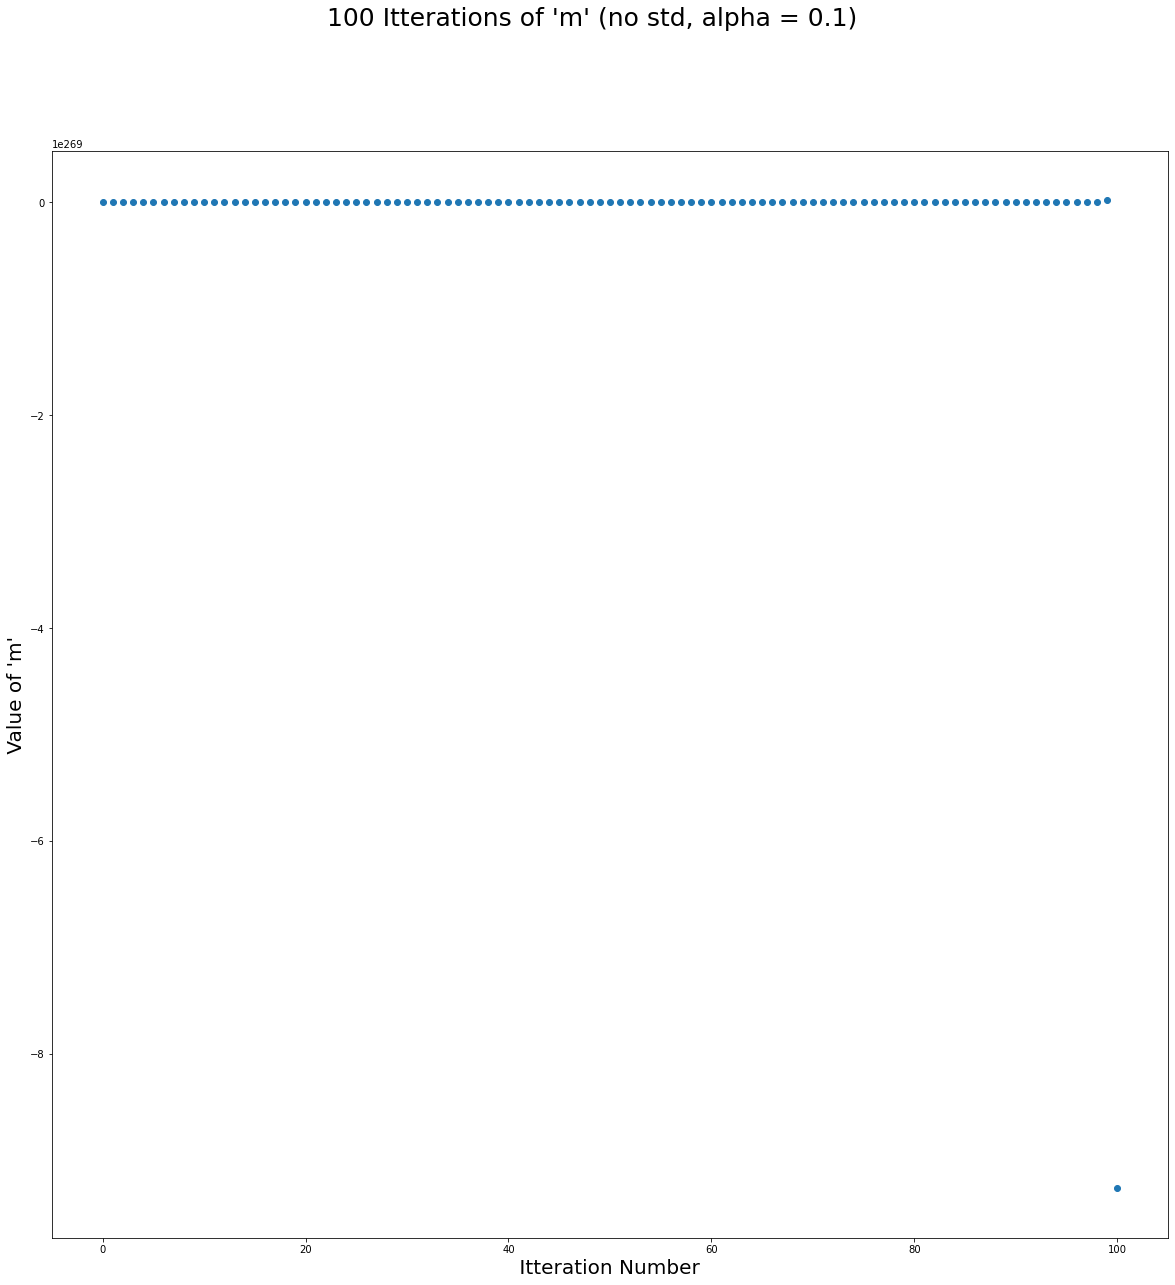

In [170]:
fig14 = plt.figure(1, figsize=(20,20))
fig14.suptitle(" 100 Itterations of 'm' (no std, alpha = 0.1) ", fontsize=25)
chart14 = fig14.add_subplot()
chart14.scatter(x_axis,res_m)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'm' ", fontsize=20)
plt.show()

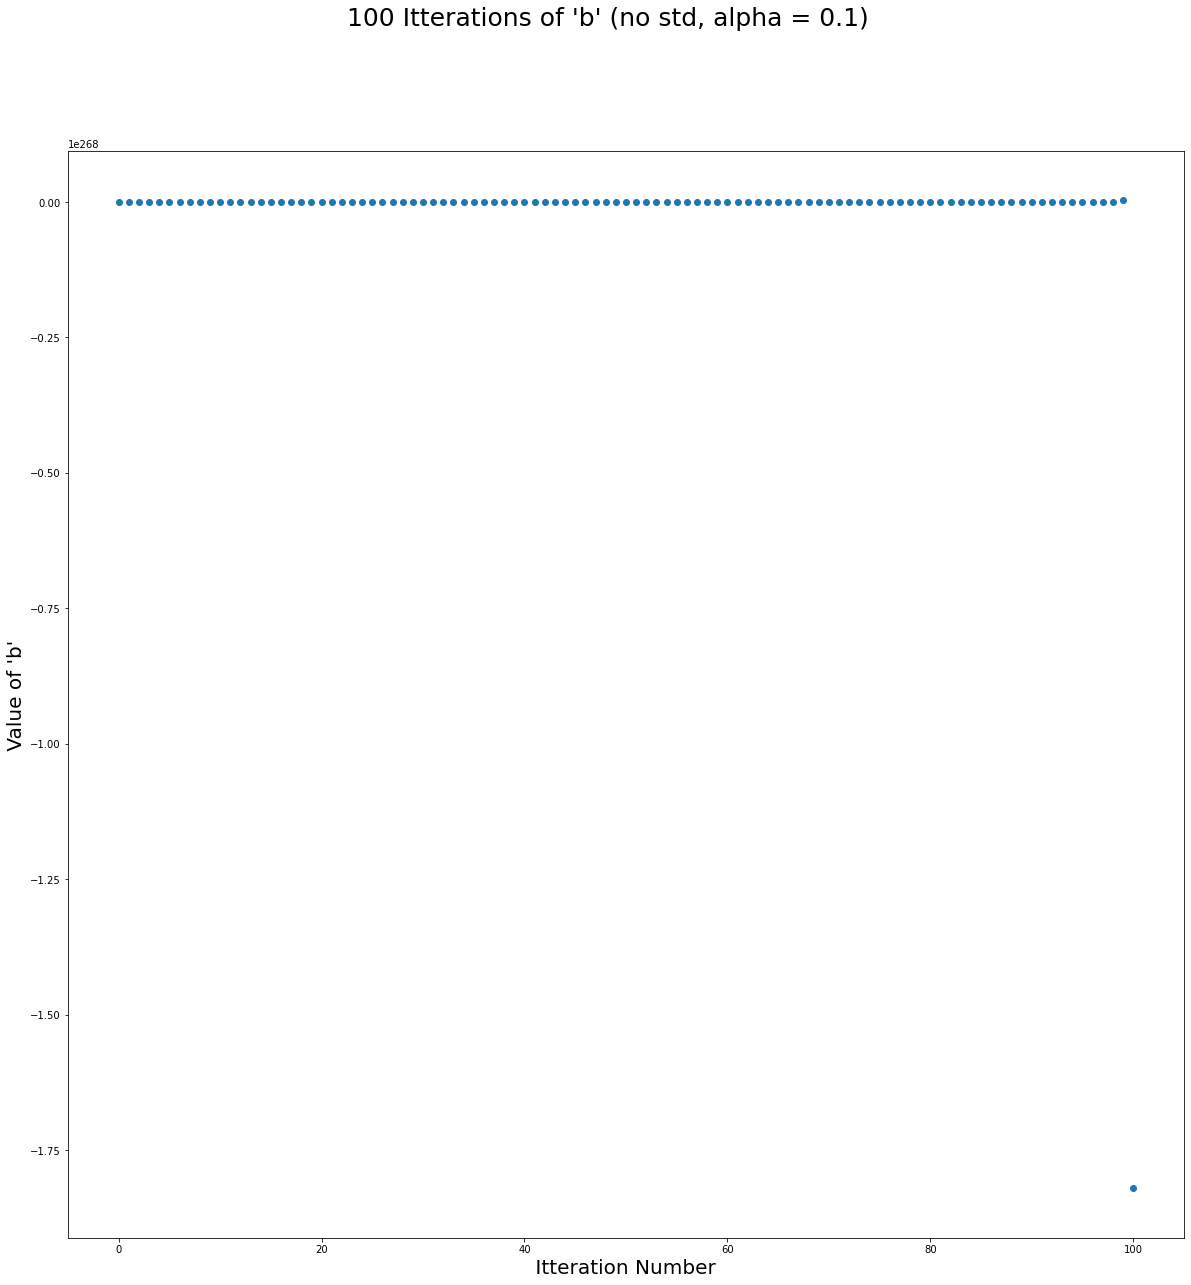

In [171]:
fig15 = plt.figure(1, figsize=(20,20))
fig15.suptitle(" 100 Itterations of 'b' (no std, alpha = 0.1) ", fontsize=25)
chart15 = fig15.add_subplot()
chart15.scatter(x_axis,res_b)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'b' ", fontsize=20)
plt.show()

In [172]:
# fig16 = plt.figure(1, figsize=(20,20))
# fig16.suptitle(" 100 Itterations of 'error' (no std, alpha = 0.1) ", fontsize=25)
# chart16 = fig16.add_subplot()
# chart16.scatter(x_axis,res_e)
# plt.xlabel(" Itteration Number ", fontsize=20)
# plt.ylabel(" Value of 'error' ", fontsize=20)
# plt.show()

In [173]:
res_m = []
res_b = []
res_e = []


m = -0.5
b = 0
a = 0.1

res_m.append(m)
res_b.append(b)

mid_std = standardization(midterms)
fin_std = standardization(finals)

res_e.append(error(mid_std,fin_std,m,b))

# with standardization
for i in range(2000):
    m_new = new_m(mid_std,fin_std,m,b,a)
    b_new = new_b(mid_std,fin_std,m,b,a)
    err_new = error(mid_std,fin_std,m_new,b_new)

    res_m.append(m_new)
    res_b.append(b_new)
    res_e.append(err_new)

    m = m_new
    b = b_new

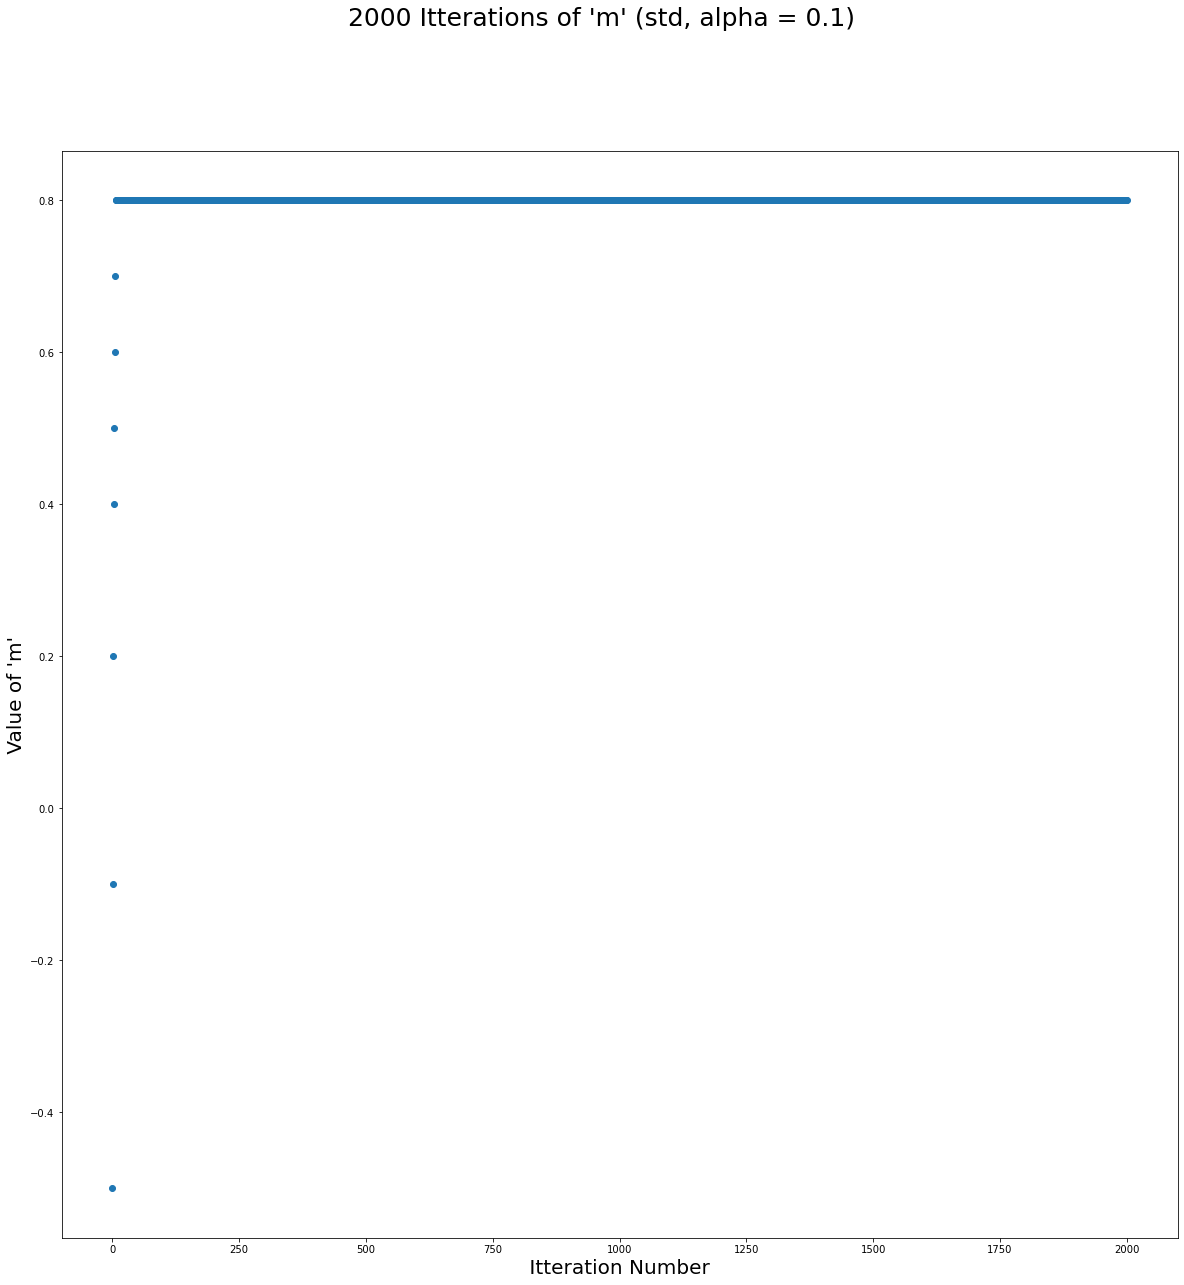

In [174]:
x_axis = [x for x in range(0,2001)]
fig17 = plt.figure(1, figsize=(20,20))
fig17.suptitle(" 2000 Itterations of 'm' (std, alpha = 0.1) ", fontsize=25)
chart17 = fig17.add_subplot()
chart17.scatter(x_axis,res_m)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'm' ", fontsize=20)
plt.show()

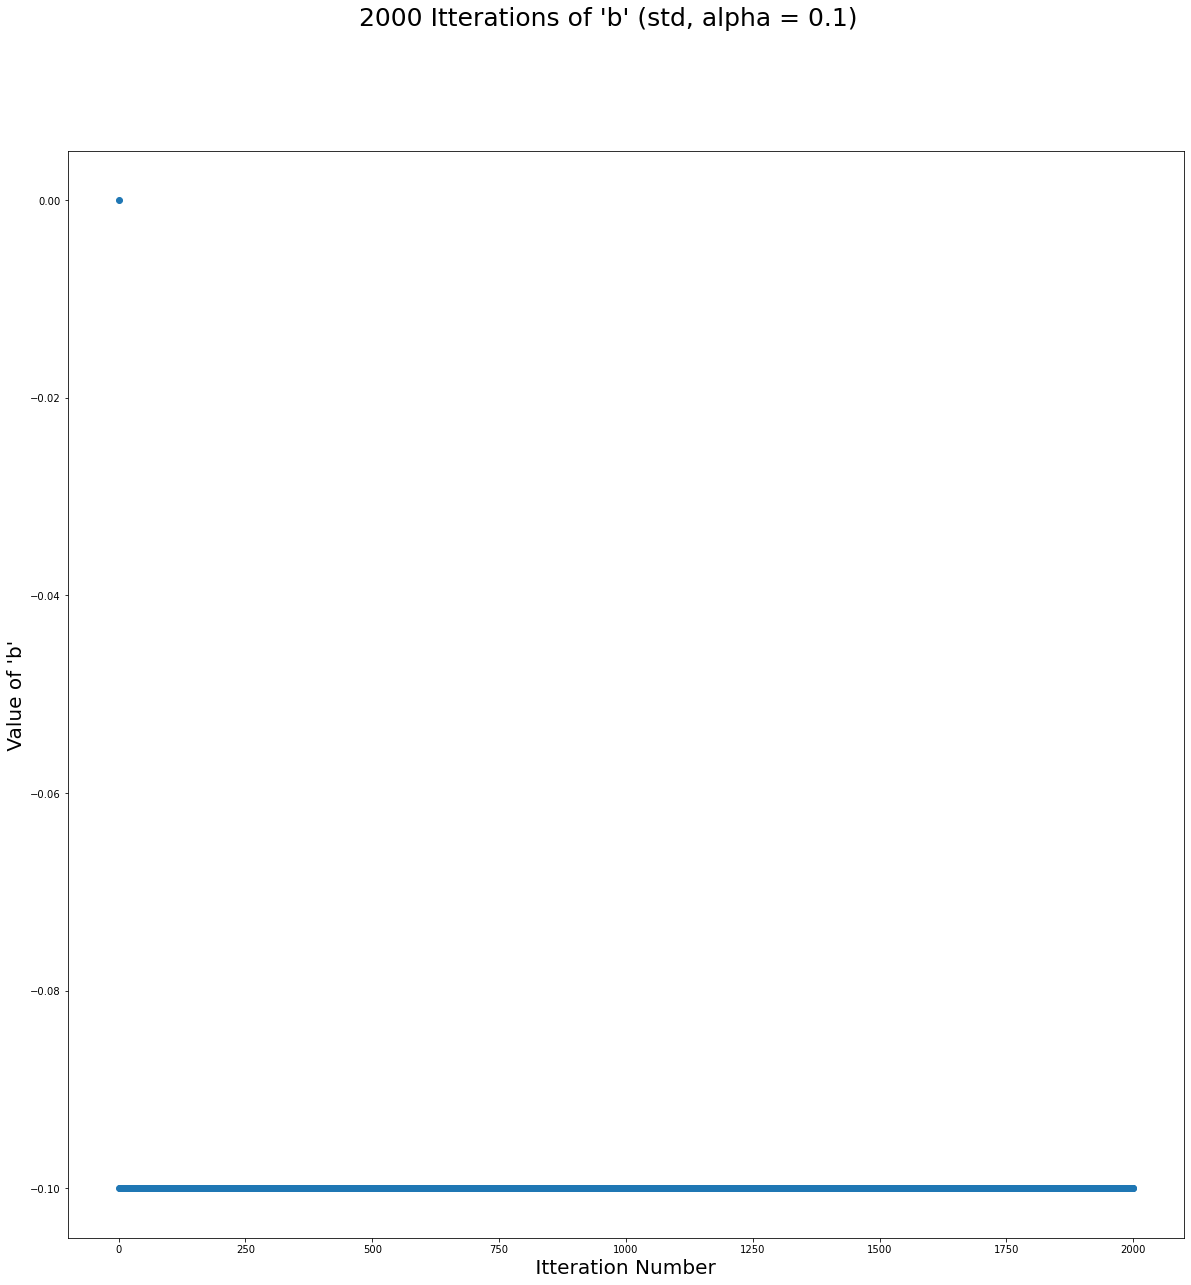

In [175]:
fig18 = plt.figure(1, figsize=(20,20))
fig18.suptitle(" 2000 Itterations of 'b' (std, alpha = 0.1) ", fontsize=25)
chart18 = fig18.add_subplot()
chart18.scatter(x_axis,res_b)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'b' ", fontsize=20)
plt.show()

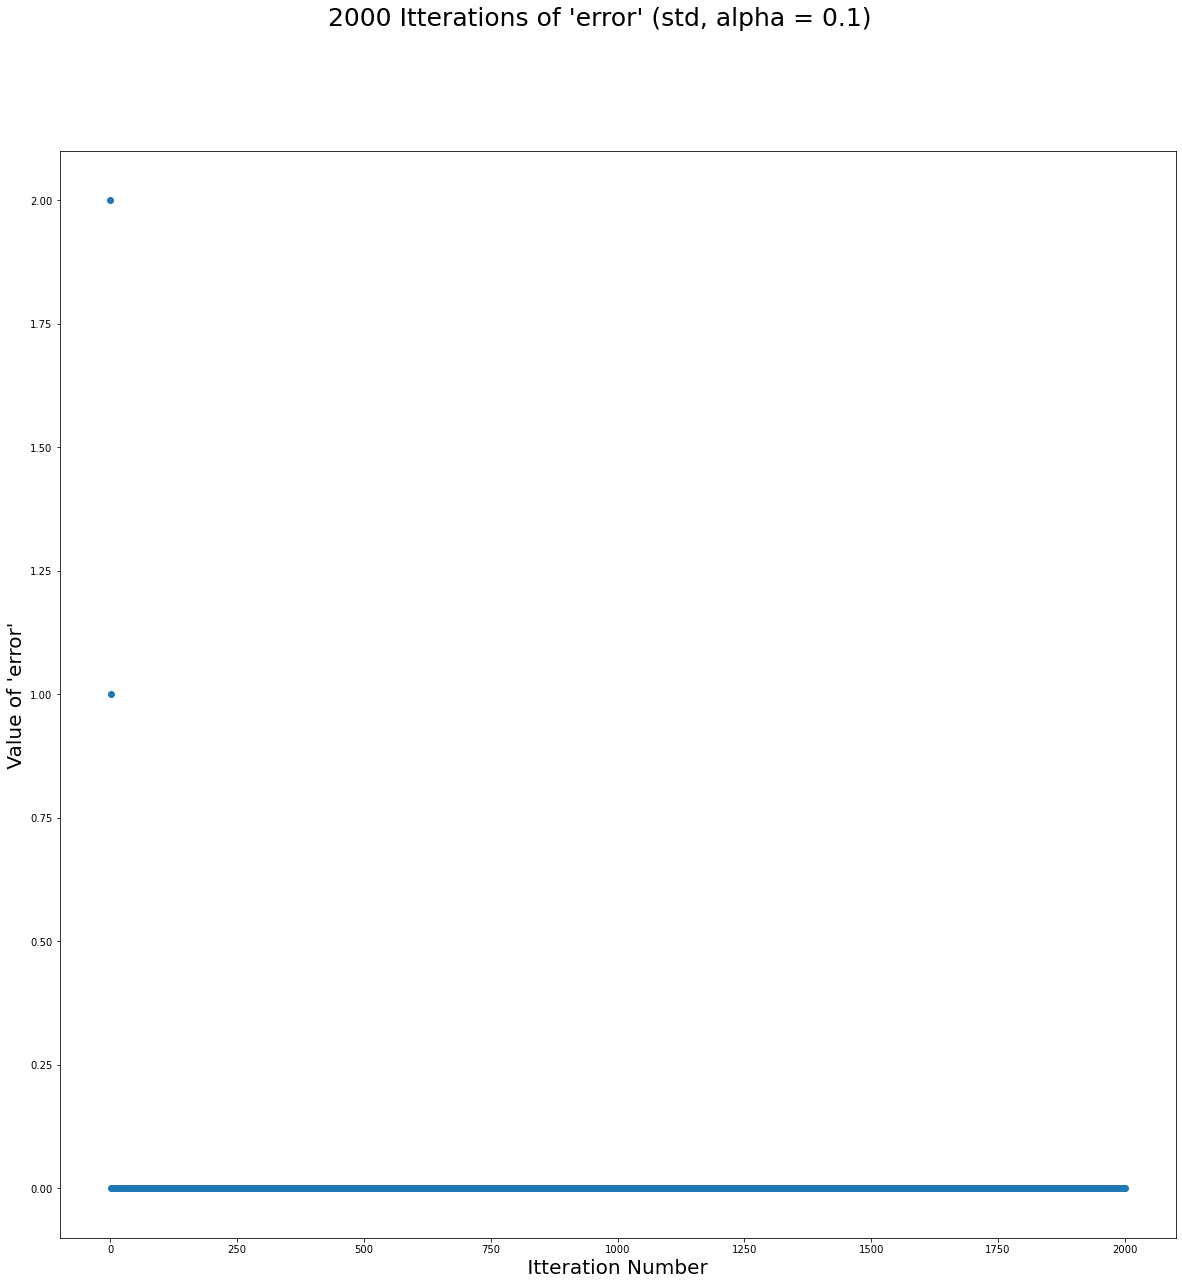

In [176]:
fig19 = plt.figure(1, figsize=(20,20))
fig19.suptitle(" 2000 Itterations of 'error' (std, alpha = 0.1) ", fontsize=25)
chart19 = fig19.add_subplot()
chart19.scatter(x_axis,res_e)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'error' ", fontsize=20)
plt.show()

In [177]:
res_m = []
res_b = []
res_e = []


mval = -0.5
bval = 0
alp = 0.1

res_m.append(mval)
res_b.append(bval)
res_e.append(error(midterms,finals,mval,bval))

# without standardization
for i in range(2000):
    m_new = new_m(midterms,finals,mval,bval,alp)
    b_new = new_b(midterms,finals,mval,bval,alp)
    # err_new = error(midterms,finals,m_new,b_new)

    res_m.append(m_new)
    res_b.append(b_new)
    # res_e.append(err_new)

    mval = m_new
    bval = b_new

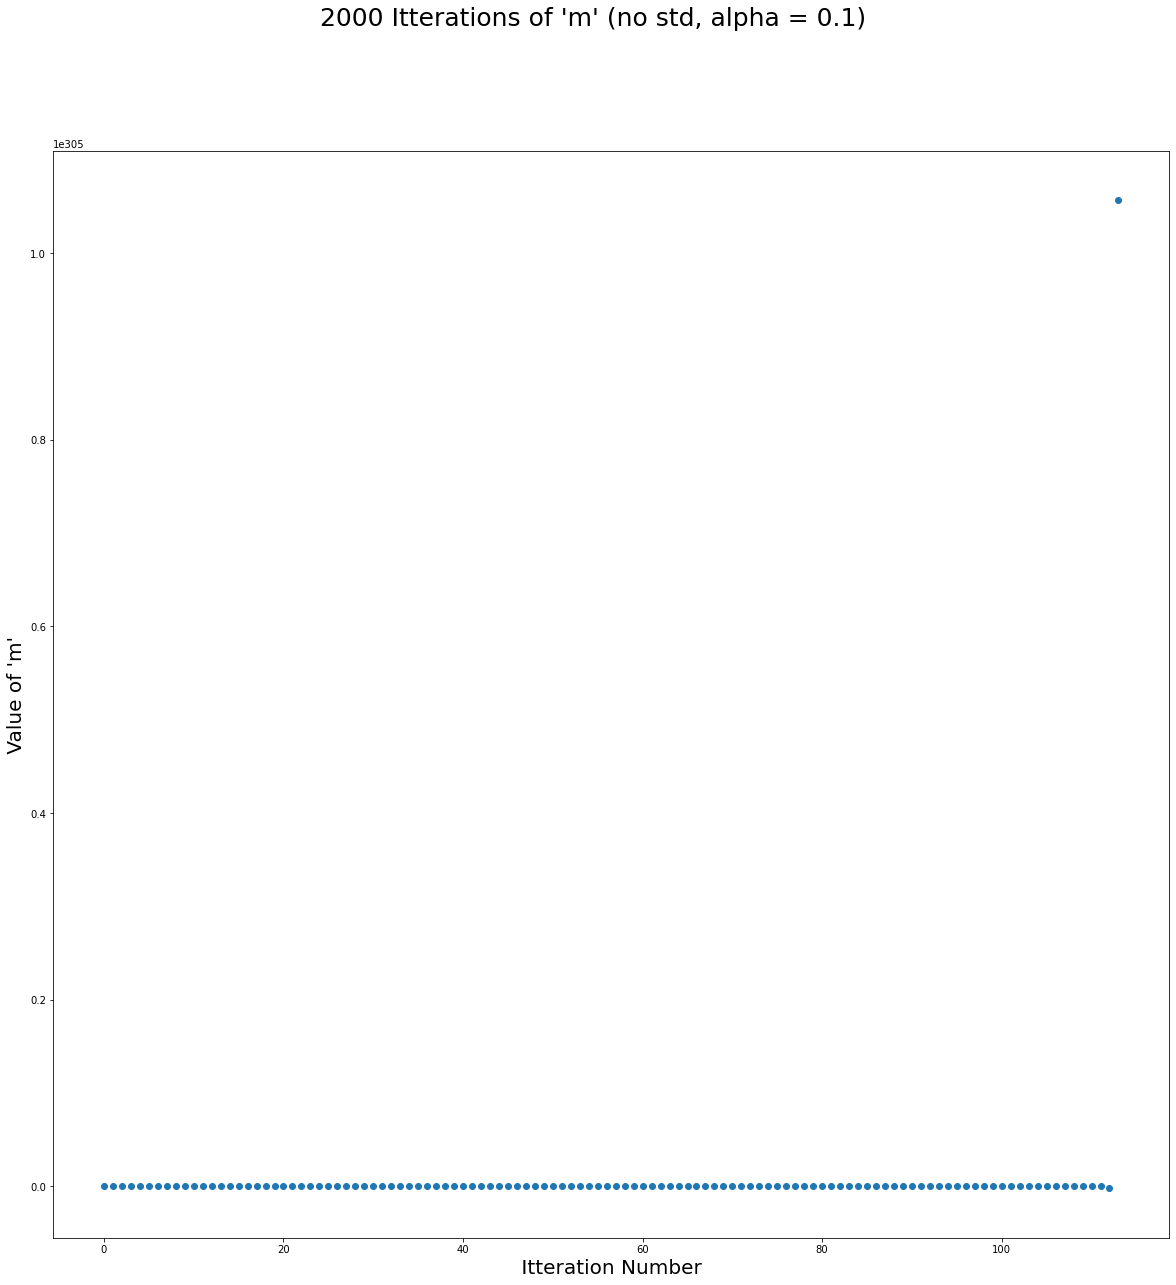

In [178]:
x_axis = [x for x in range(0,2001)]
fig20 = plt.figure(1, figsize=(20,20))
fig20.suptitle(" 2000 Itterations of 'm' (no std, alpha = 0.1) ", fontsize=25)
chart20 = fig20.add_subplot()
chart20.scatter(x_axis,res_m)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'm' ", fontsize=20)
plt.show()

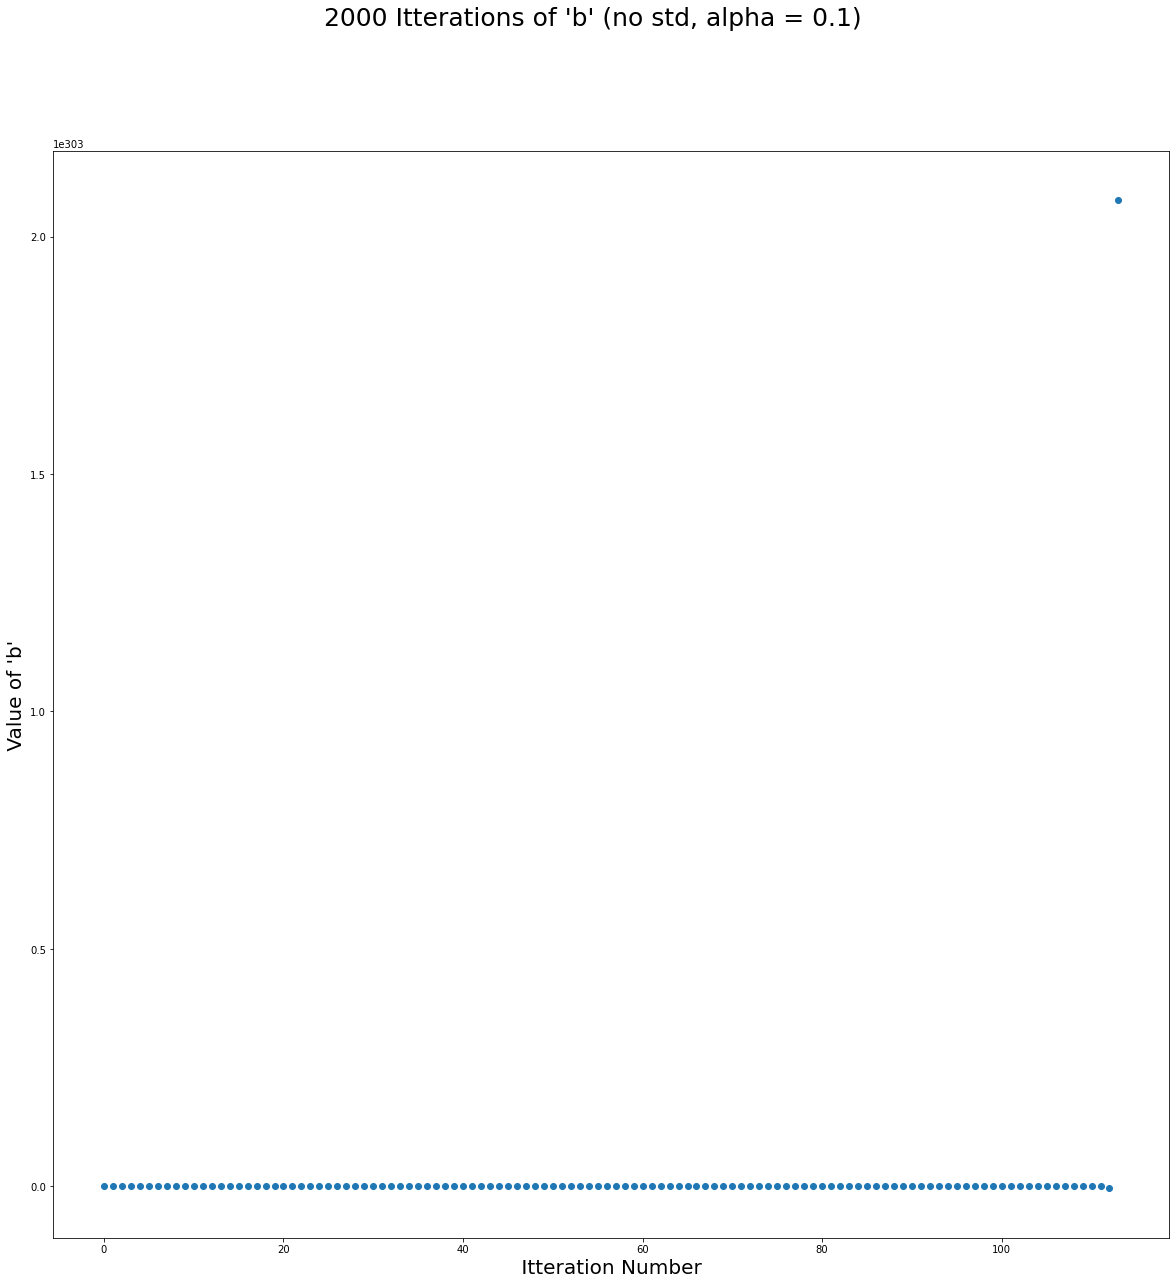

In [179]:
fig21 = plt.figure(1, figsize=(20,20))
fig21.suptitle(" 2000 Itterations of 'b' (no std, alpha = 0.1) ", fontsize=25)
chart21 = fig21.add_subplot()
chart21.scatter(x_axis,res_b)
plt.xlabel(" Itteration Number ", fontsize=20)
plt.ylabel(" Value of 'b' ", fontsize=20)
plt.show()